<a href="https://colab.research.google.com/github/keshavkushwah03/Regression_Project_On_Seoul_Bike_Rental_count_By_Keshav/blob/main/Copy_of_K_Regression_Project_On_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

In response to the escalating fuel consumption and climate impact caused by increased private vehicle usage in metropolitan areas, many countries, including South Korea, have embraced sustainable development measures. Among these initiatives, the Bike Share program in Seoul has emerged as a solution to address public mobility challenges and create a healthier environment for citizens. This system offers an affordable and eco-friendly alternative for short-distance travel, empowering individuals to conveniently access bikes at various stations across the city.

The Bike Share program promotes physical activity through pedaling, contributing to the improvement of public health. Moreover, the installation of bike stations city-wide has significantly enhanced accessibility to various areas, ensuring ease of travel for users. The docking stations, equipped with smart technology, allow seamless bike pickup and drop-off, providing users with trip details and the ability to track their physical activity.

# **Problem Statement**

The aim of this bike sharing regression project is to develop a predictive model that can predict the "Rented Bike count" at each hour in Seoul, South Korea, based on various environmental and temporal factors. The dataset contains information such as Date, Hour, Temperature, Humidity, Windspeed, Visibility, Dew point temperature, Solar radiation, Rainfall, Snowfall, Seasons, Holiday, and Functional Day.

By accurately estimating bike rental demand, the project seeks to optimize bike sharing services, ensure the availability of bikes at peak times, and enhance the overall user experience and To protect our environment from the gases emitted by vehicles.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")











### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv ('/content/drive/MyDrive/DATA sets of Regression Projects/SeoulBikeData.csv',sep=',',encoding='latin-1')

### Dataset First View

In [ ]:
# Dataset First Look
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows = dataset.shape[0]
num_cols = dataset.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 8760
Number of columns: 14


### Dataset Information

In [ ]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Check for duplicate rows
duplicate_rows = dataset[dataset.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#####Visualizing the missing values
There is no missing value in our dataset so no need to visualizing missing values because it will show nothing in visualization

### What did you know about your dataset?

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

1. We count total number of raw and column in our dataset where we found that we have 14 columns and 8760 rows.

2. Next we get information of our dataset where we check the data type of our dataset where we found- columns of dtypes: float64(6), int64(4), object(4).

3. Next we check the duplicate value as well as missing value in our dataset where we found there is no duplicate value and missing value in our dataset.


## ***2. Understanding Your Variables***

In [ ]:
# get the Dataset Column names
columns = dataset.columns
# Print the column names
print("Columns:")
for column in columns:
    print(column)

Columns:
Date
Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Seasons
Holiday
Functioning Day


In [ ]:
# Dataset Describe
dataset.describe().transpose()
#I am using transpose method for better view.

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

1. Date: Date on which bikes are rented.

2. Rented Bike Count: The number of bikes rented on the given date and time.

3. Hour:  For how many Hour of the day bike was rented (0-23).

4. Temperature(°C): The temperature in degrees Celsius at the time of the bike rental.

5. Humidity(%): The relative humidity in percentage.

6. Wind Speed (m/s): The wind speed in meters per second.

7. Visibility (10m): The visibility distance in meters.

8. Dew Point Temperature(°C): The dew point temperature in degrees Celsius.

9. Solar Radiation (MJ/m2): The solar radiation in MegaJoules per square meter.

10. Rainfall(mm): The amount of rainfall in millimeters.

11. Snowfall (cm): The amount of snowfall in centimeters.

12. Seasons: The season at the time of the bike rental. It could be Spring, Summer, Autumn, or Winter.

13. Holiday: Indicates whether it was a holiday or not (Yes or No).

14. Functioning Day: Indicates whether the bike rental system was functioning on that day (Yes or No).

### Check Unique Values for each variable.

In [ ]:
for column in dataset.columns:
    num_unique_values =dataset[column].nunique()
    print(f"Total No. of unique values in '{column}': {num_unique_values}")

Total No. of unique values in 'Date': 365
Total No. of unique values in 'Rented Bike Count': 2166
Total No. of unique values in 'Hour': 24
Total No. of unique values in 'Temperature(°C)': 546
Total No. of unique values in 'Humidity(%)': 90
Total No. of unique values in 'Wind speed (m/s)': 65
Total No. of unique values in 'Visibility (10m)': 1789
Total No. of unique values in 'Dew point temperature(°C)': 556
Total No. of unique values in 'Solar Radiation (MJ/m2)': 345
Total No. of unique values in 'Rainfall(mm)': 61
Total No. of unique values in 'Snowfall (cm)': 51
Total No. of unique values in 'Seasons': 4
Total No. of unique values in 'Holiday': 2
Total No. of unique values in 'Functioning Day': 2


In [ ]:
unique_Seasons = dataset['Seasons'].value_counts()
print(unique_Seasons)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


In [ ]:
unique_Holiday= dataset['Holiday'].value_counts()
print(unique_Holiday)

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


In [ ]:
unique_Functioning_Day = dataset['Functioning Day'].value_counts()
print(unique_Functioning_Day)

Yes    8465
No      295
Name: Functioning Day, dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# First we creat a copy of our original dataset.
copy_ds = dataset.copy()

In [ ]:
copy_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# converting date variable in to datetime datatype

copy_ds['Date'] = pd.to_datetime(copy_ds['Date'], format='%d/%m/%Y')



In [ ]:
# Now we extracting month from the date variable.

copy_ds['Month'] = copy_ds['Date'].dt.month



In [ ]:
# Now we creating new variable that cantain day of week(Monday, Tuesday, etc.)
copy_ds['Weekday'] = copy_ds['Date'].dt.day_name()

In [ ]:
# Next again create a new column indicating whether it's a weekend (Saturday or Sunday) as an integer
copy_ds['Weekend'] =copy_ds['Date'].dt.dayofweek.isin([5, 6]).astype(int)  # 1 for weekend (Saturday or Sunday), 0 for non-weekend


In [ ]:
#Now we drop the date column from our data copy_ds,because no further need of date column.
copy_ds.drop(columns='Date', inplace=True)

In [ ]:
copy_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [ ]:
copy_ds

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0


In [ ]:
# Renaming the columns so that we can iterate without any problem of missing space while execution of code
copy_ds.rename(columns= {'Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day','Month':'month',
                       'Weekday':'weekday', 'Weekend':'weekend'},
          inplace=True)

In [ ]:
copy_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  func_day           8760 non-null   object 
 13  month              8760 non-null   int64  
 14  weekday            8760 non-null   object 
 15  weekend            8760 non-null   int64  
dtypes: float64(6), int64(6),

### What all manipulations have you done and insights you found?

1. First we creat a copy of our original dataset as copy_ds.
2. Then covert date column from object to datetime for feautur enggineering.
3. Then extract year,month,day from date column and put in new three column that can we check in info.
4. Next we creat a new variable that contain a week of day like Monday,Tuesday etc. and give the name weekday to this variable.
5. Again we creat a new column that contain  weeeekend days like Saturday and Sunday and give the name of that variable is weekend.
6. Then we drop a date column becuase no further use of date column.
7. Next we rename the variables beacuse in our dataset variables contain space like Rental Bike Count and we replace it with the rental_bike_count in our copy_ds.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

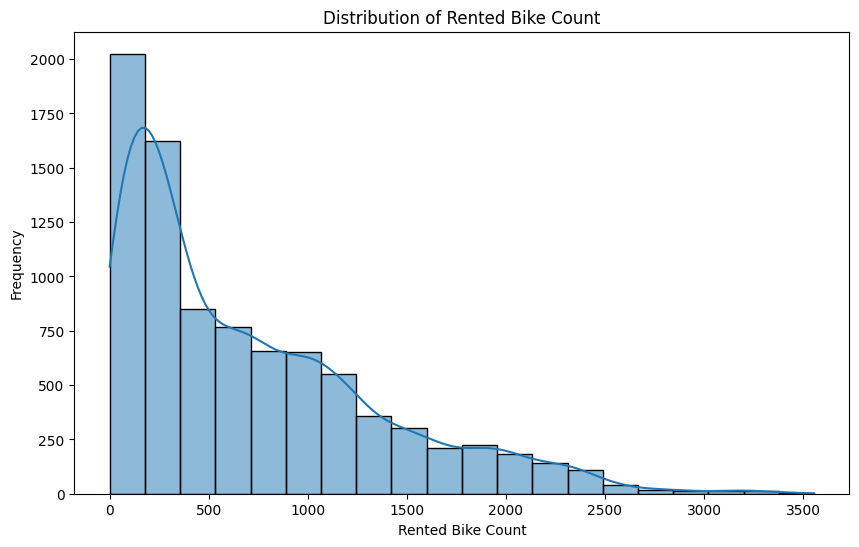

In [ ]:
# Distribution of Rented Bike Count
plt.figure(figsize=(10, 6))
sns.histplot(copy_ds['rented_bike_count'], bins=20, kde=True)
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rented Bike Count')
plt.show()

In [ ]:
# Calculate skewness of the dependent variable 'rented_bike_count'
skewness = copy_ds['rented_bike_count'].skew()
print("Skewness of 'rented_bike_count':", skewness)

Skewness of 'rented_bike_count': 1.1534281773679014


<Axes: xlabel='rented_bike_count', ylabel='Density'>

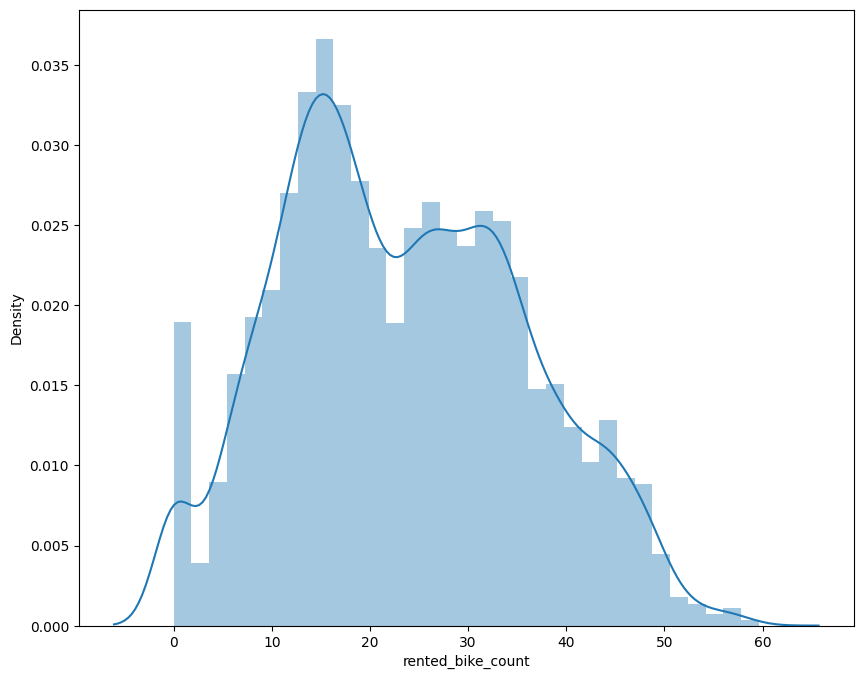

In [ ]:
# Transform the data of rental_bike_count from Right skew to normally distributed date

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(copy_ds['rented_bike_count']))

In [ ]:
# skew of the dependent variable after sqrt transformation

np.sqrt(copy_ds['rented_bike_count']).skew()

0.237362090985412

Bingo.......! Here we transform the data of rental_bike_count from Right skew to normally distributed date as we saw above.

##### 1. Why did you pick the specific chart?

With the help of distribution chart we can check skewness of our renatal_bike_count variable that will dependent variable for our model.

##### 2. What is/are the insight(s) found from the chart?

As we can see above rental_bike_count is positively skewed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we know for better prediction for our model we required that our dependent variable is almost normally distributed, for that we can transform the data by log, sqrt, etc.

#### Chart - 2

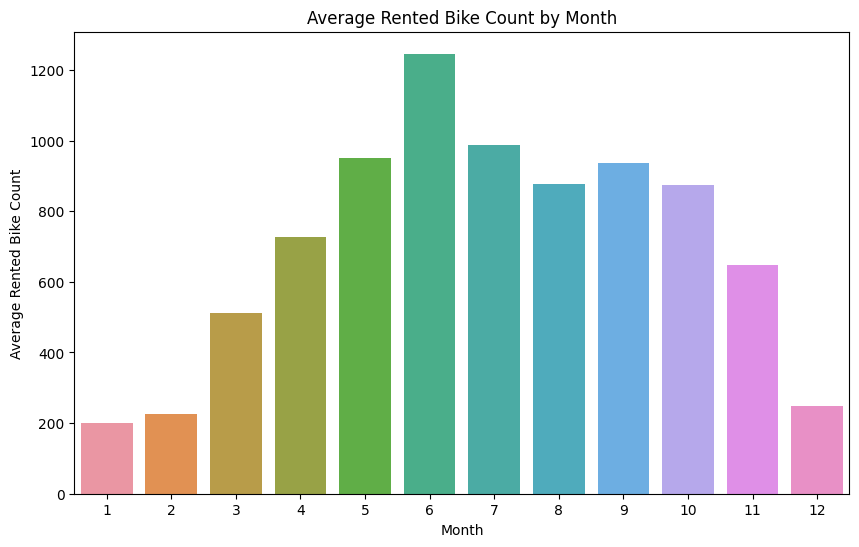

In [ ]:
# Average Rented Bike Count by Month
plt.figure(figsize=(10, 6))
monthly_avg = copy_ds.groupby('month')['rented_bike_count'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Month')
plt.show()

##### 1. Why did you pick the specific chart?

With the help of above bar chart we can check average rented bike count per month.

##### 2. What is/are the insight(s) found from the chart?

As we can see above that in the month of 1st,2nd and 12th there is a minimum number of average bikes are rented that was approx. (200).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can use this insight positively with the help of above information we can suggest to company that we can give our bike for maintenance and service repair work in the months of 1st,2nd and 12th.

#### Chart - 3

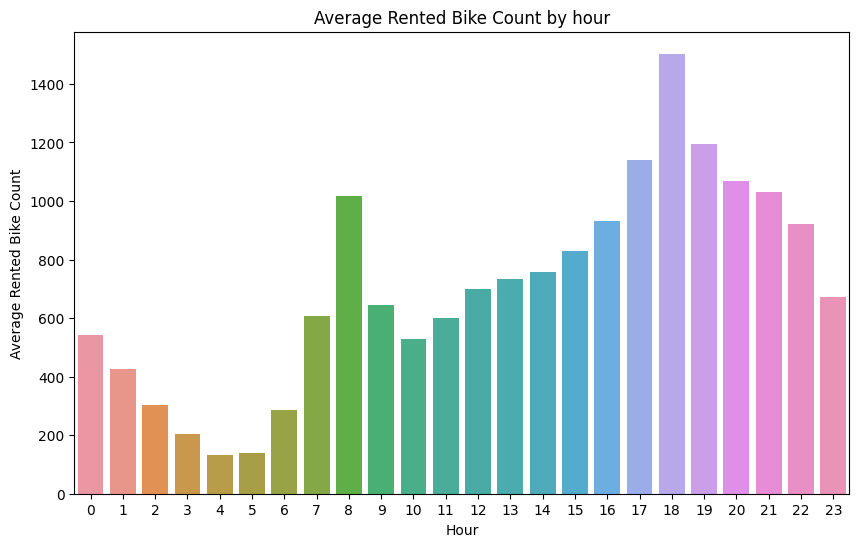

In [ ]:
# Average Rented Bike Count by Day
plt.figure(figsize=(10, 6))
hour_avg = copy_ds.groupby('hour')['rented_bike_count'].mean()
sns.barplot(x=hour_avg.index, y=hour_avg.values)
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by hour')
plt.show()

##### 1. Why did you pick the specific chart?

With the help of above bar chart we can check average rented bike count per hours.

##### 2. What is/are the insight(s) found from the chart?

Here we see that in between 2 to 6 am rented rate of bikes are low and in pick hours in morning 8 to 10 and in evening 5 to 8 pm rented bikes rate are high that is important insight we got from this chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By the help of this insight we can manage the fequerncy of bikes high at the time of pick hour/office hour.

#### Chart - 4

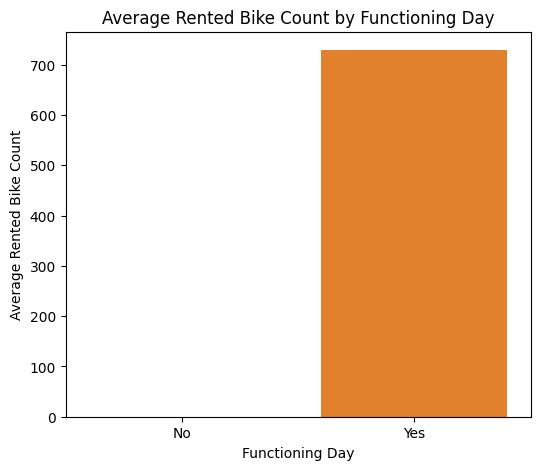

In [ ]:
# Average Rented Bike Count by Functioning Day
plt.figure(figsize=(6, 5))
avg_by_func_day = copy_ds.groupby('func_day')['rented_bike_count'].mean()
sns.barplot(x=avg_by_func_day.index, y=avg_by_func_day.values)
plt.xlabel('Functioning Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Functioning Day')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are effective in visualizing and comparing the distribution of a continuous variable (average rented bike count) among discrete categories (functioning days).

##### 2. What is/are the insight(s) found from the chart?

The fact that there is a notable difference between the average number of rented bikes on functioning days and non-functioning days suggests that the operating days of the business play a crucial role in bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be valuable for decision-making. The business might consider strategies to increase bike rentals on non-functioning days, such as offering special promotions, extending operating hours, or providing additional incentives.

#### Chart - 5

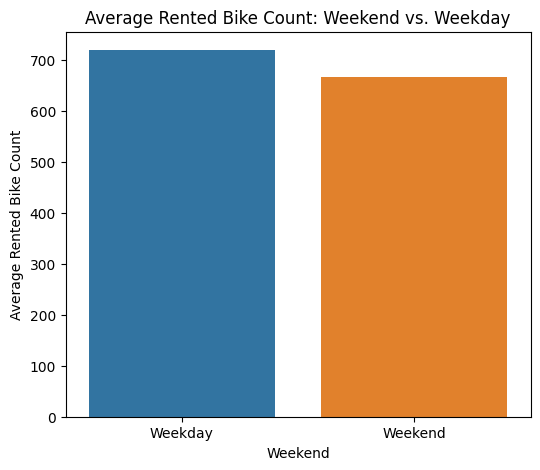

In [ ]:
# Weekend vs. Weekday Rentals
plt.figure(figsize=(6, 5))
avg_by_weekend = copy_ds.groupby('weekend')['rented_bike_count'].mean()
sns.barplot(x=avg_by_weekend.index, y=avg_by_weekend.values)
plt.xlabel('Weekend')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count: Weekend vs. Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a bar plot that compares the average rented bike count between weekends and weekdays.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the average number of rented bikes is higher on weekdays compared to weekends. On weekdays, the average is around 700 bikes, while on weekends, it's around 650 bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the business successfully implements strategies to boost weekend rentals, it can lead to increased revenue and overall growth. Targeting weekend customers can help in achieving a more balanced utilization of resources.

#### Chart - 6

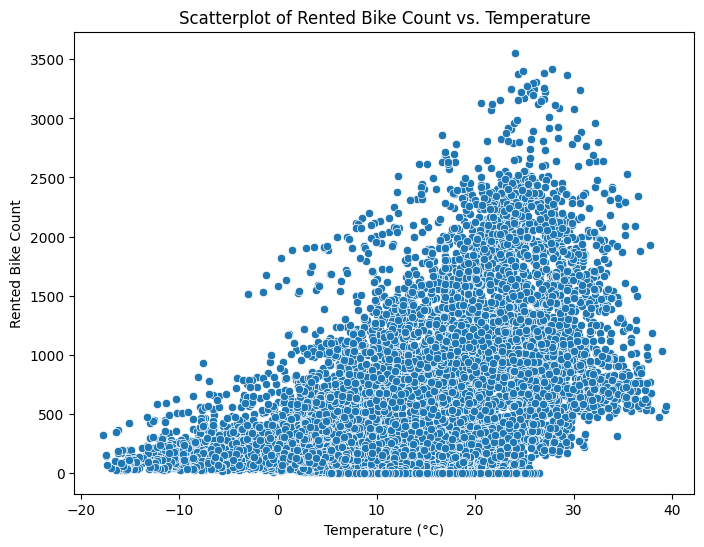

In [ ]:
# Scatterplot of Rented Bike Count vs. Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='rented_bike_count', data=copy_ds)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Scatterplot of Rented Bike Count vs. Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a scatterplot that visualizes the relationship between two continuous variables: "Rented Bike Count" and "Temperature."

##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation between temperature and rented bike count. As the temperature increases, there is a tendency for higher bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this scatterplot can have a positive business impact. Bike rental services can leverage this information to optimize their operations:

During warmer months or seasons, businesses can anticipate higher bike rental demand and ensure an adequate supply of bikes.

#### Chart - 7

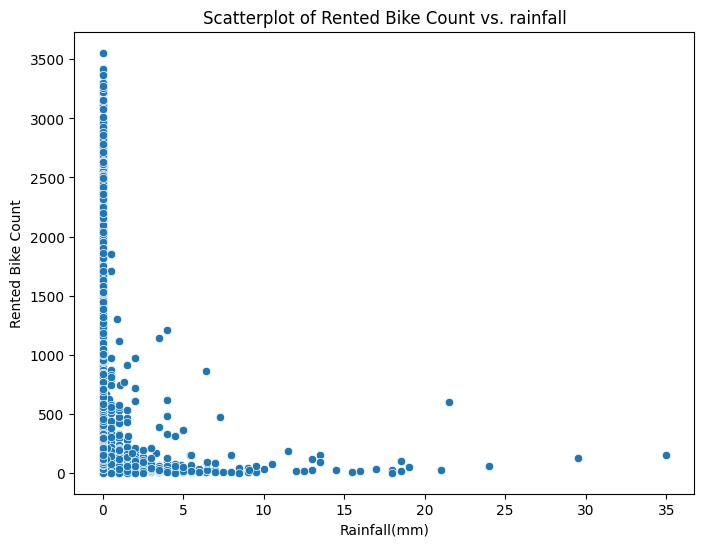

In [ ]:
# Scatterplot of Rented Bike Count vs. Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rainfall', y='rented_bike_count', data=copy_ds)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Scatterplot of Rented Bike Count vs. rainfall')
plt.show()

##### 1. Why did you pick the specific chart?

The selected chart is a scatterplot that visualizes the relationship between two continuous variables: "Rented Bike Count" and "Rainfall."

##### 2. What is/are the insight(s) found from the chart?

Bike rental count does not seem to be significantly affected by variations in rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Bike rental services could choose to operate during rainy periods.

#### Chart - 8

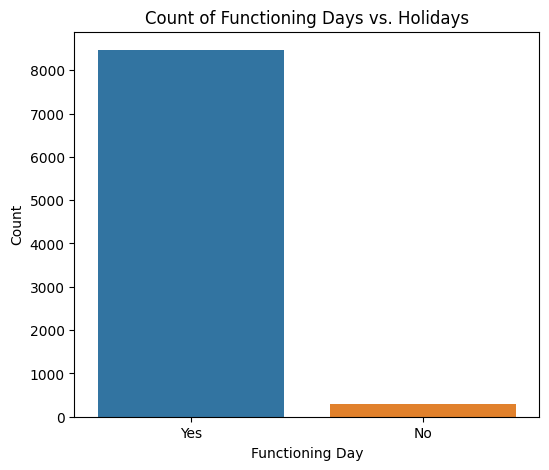

In [ ]:
# Count of Functioning Days vs. Holidays
plt.figure(figsize=(6, 5))
func_day_counts = copy_ds['func_day'].value_counts()
sns.barplot(x=func_day_counts.index, y=func_day_counts.values)
plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.title('Count of Functioning Days vs. Holidays')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a bar plot that illustrates the count of functioning days versus holidays.

##### 2. What is/are the insight(s) found from the chart?

The business operates on a considerably larger number of functioning days compared to holidays.

This could indicate that the business caters to regular commuting and transportation needs, which are more prevalent on functioning days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can tailor its operations, services, and resources to accommodate higher demands on functioning days, potentially offering extended service hours, more bikes, and improved customer support.


#### Chart - 9

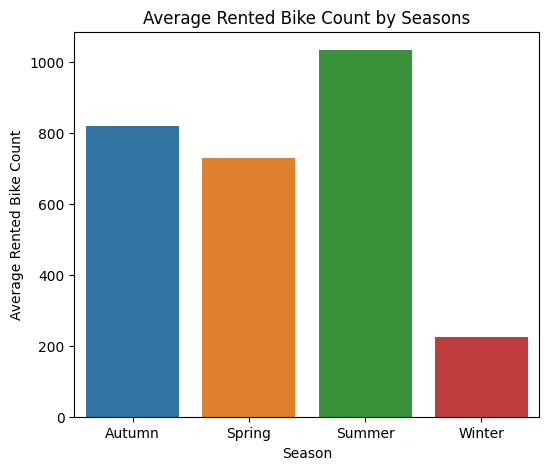

In [ ]:
# Average Rented Bike Count by Seasons
plt.figure(figsize=(6, 5))
avg_by_season = copy_ds.groupby('seasons')['rented_bike_count'].mean()
sns.barplot(x=avg_by_season.index, y=avg_by_season.values)
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

The above chart is a bar plot that illustrates the average rented bike count across different seasons.

##### 2. What is/are the insight(s) found from the chart?

The highest average rented bike count is observed during the "Summer" season, followed by "Autumn," "Spring," and "Winter" in decreasing order.

This indicates a seasonal pattern where bike rentals tend to peak during the warmer months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can allocate resources and marketing efforts to capitalize on the high demand for bike rentals during the peak seasons (Summer and Autumn).

Offers, promotions, and events can be designed to attract more customers during the off-peak seasons (Winter and Spring).

#### Chart - 10 to 13

There are 7 charts in single for loop code to detecting the outliers on categorical_var in our data set.

In [ ]:
# defining categorical independent variables separately
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'weekday', 'weekend']


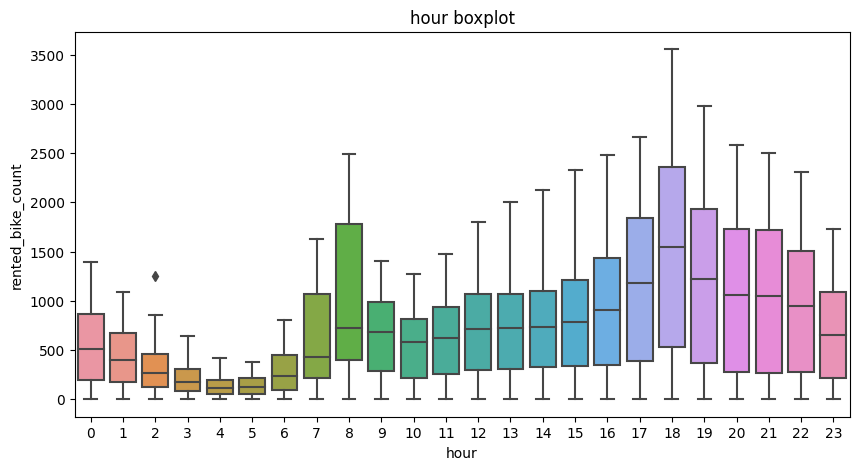

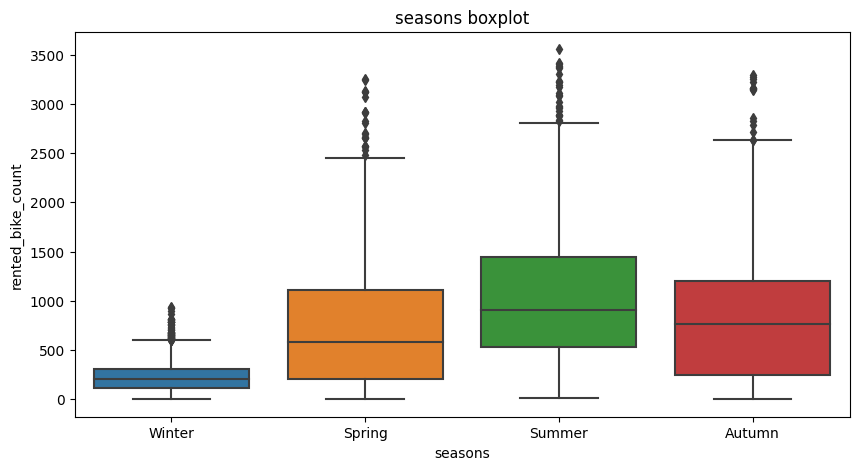

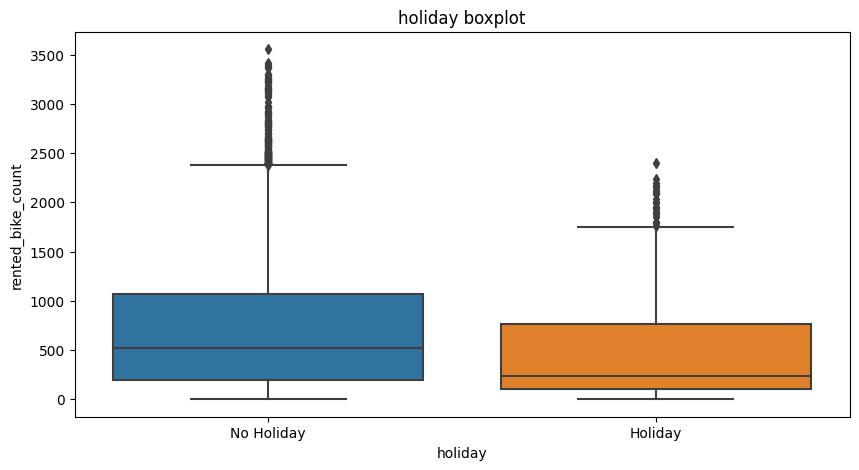

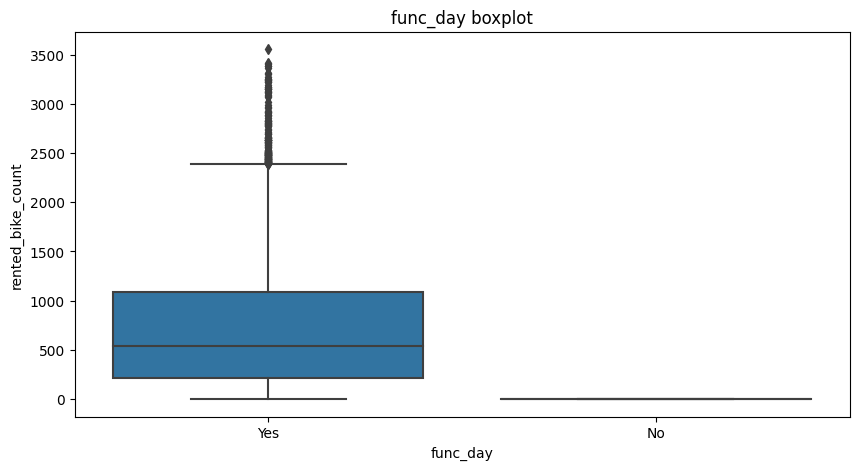

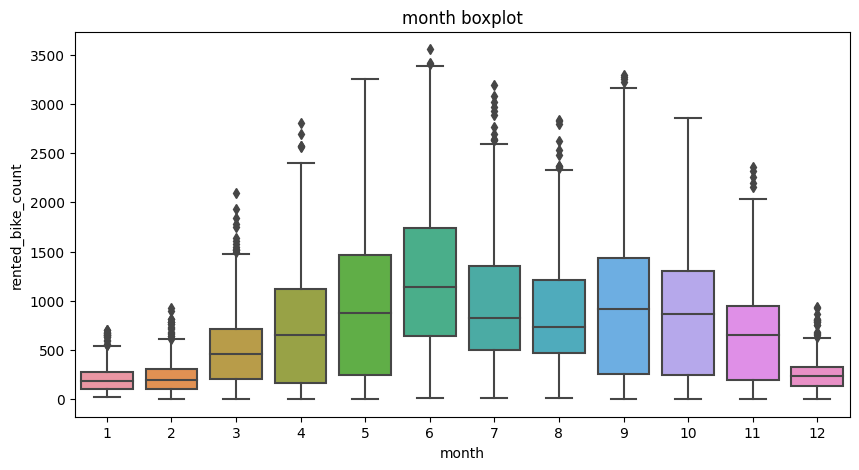

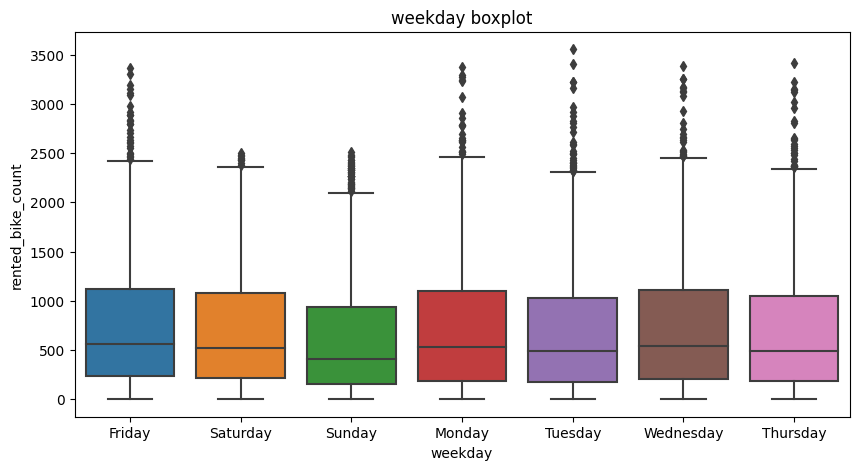

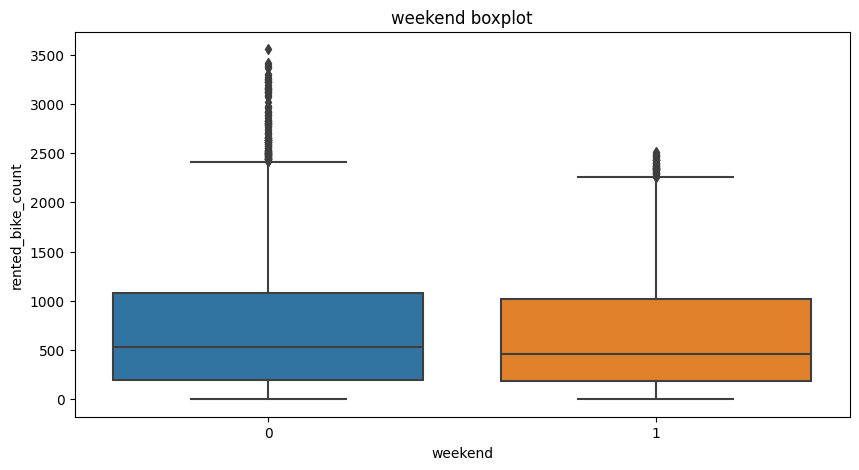

In [ ]:
# Identifying the outliers on categorical_var in our data set
for col in categorical_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x = col,y = 'rented_bike_count',data=copy_ds)
  plt.title(col+' boxplot')
  plt.show()

##### 1. Why did you pick the specific chart?

The chosen charts are boxplots, which are suitable for visualizing the distribution and identifying outliers within categorical variables.

Boxplots provide a clear visualization of the median, quartiles, and any potential outliers in the data distribution.

##### 2. What is/are the insight(s) found from the chart?

There are outliers in the data and this must be taken into consideration in the model building phase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In above box plots we can saw that there are some potential outliers in our data set so we will proceed on them according to requirement of them.

#### Chart - 14 - Correlation Heatmap

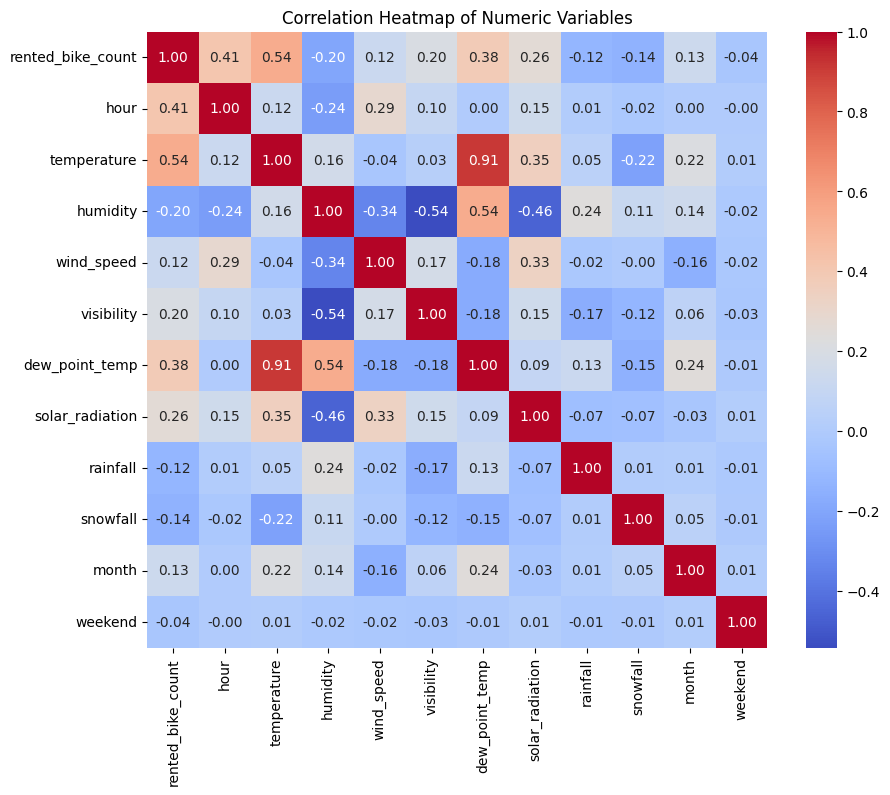

In [ ]:
# Correlation Heatmap of Numeric Variables
plt.figure(figsize=(10, 8))
corr_matrix = copy_ds.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a correlation heatmap, which is an effective way to visualize the correlation between numeric variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

**Temperature and Rented Bike Count:** There is a strong positive correlation between temperature and rented bike count. As temperature increases, the bike rental count tends to increase as well.

**Visibility and Rented Bike Count:** There is a weak positive correlation between visibility and rented bike count. Higher visibility levels are associated with slightly higher bike rental counts.

#### Chart - 15 - Pair Plot

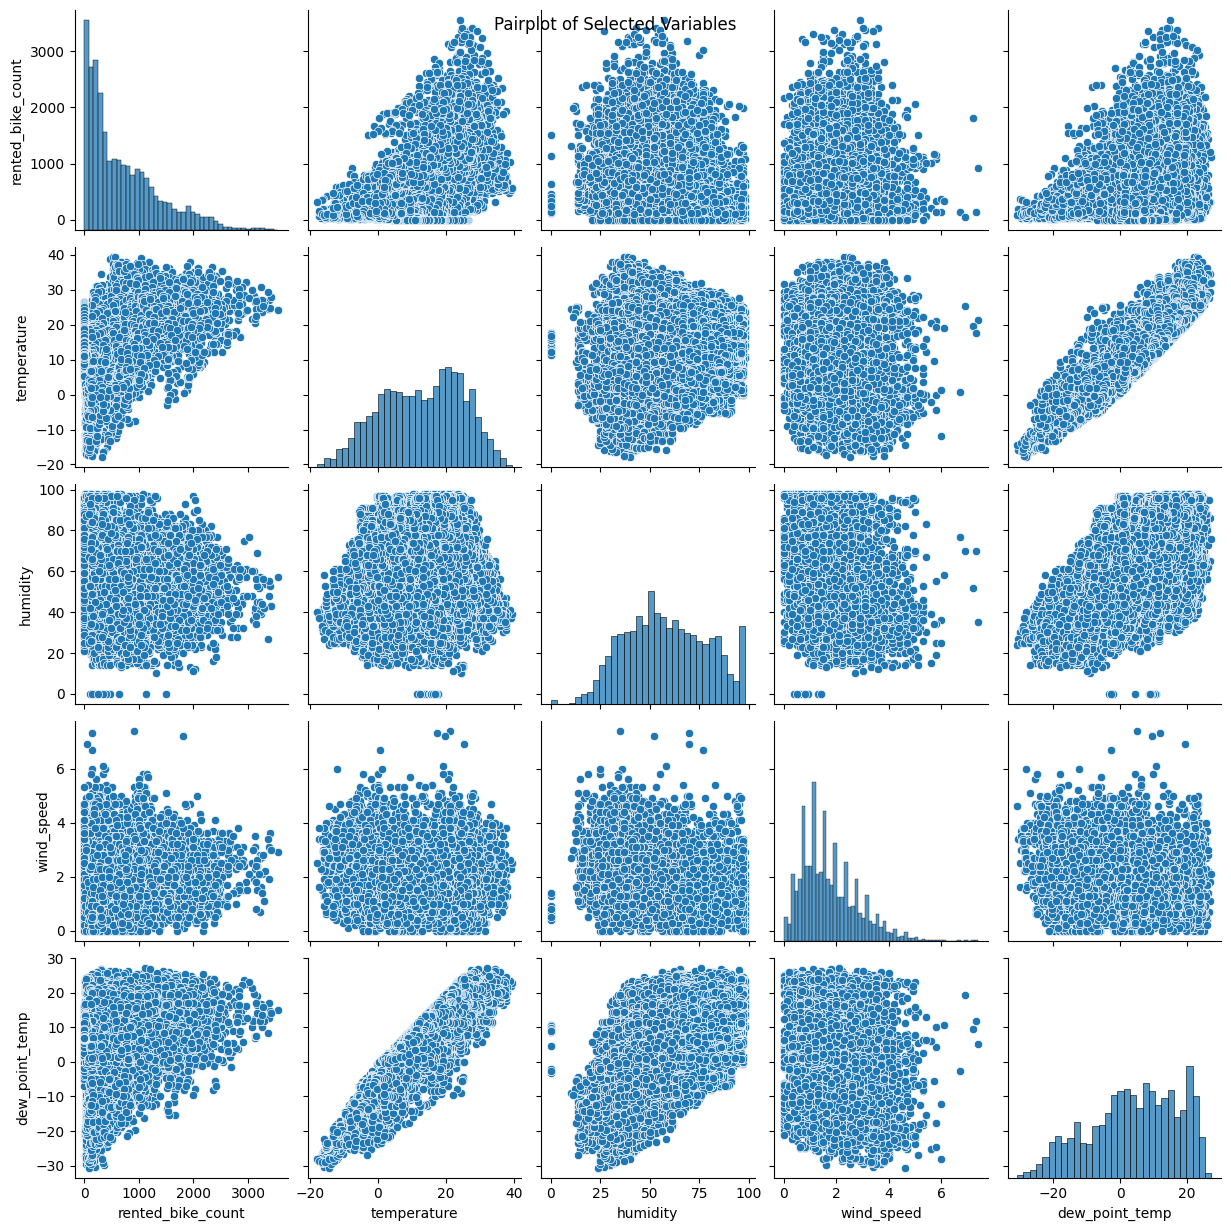

In [ ]:
# Pairplot of Selected Variables
selected_vars = ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'dew_point_temp']
sns.pairplot(copy_ds[selected_vars])
plt.suptitle('Pairplot of Selected Variables')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a pairplot, which is a grid of scatterplots displaying the relationships between pairs of selected variables.

##### 2. What is/are the insight(s) found from the chart?

**Rented Bike Count vs. Temperature:** There is a positive linear relationship between temperature and rented bike count, confirming the earlier insight that higher temperatures lead to higher bike rental counts.

**Rented Bike Count vs. Humidity:** There is a weak negative linear relationship between humidity and rented bike count, suggesting that higher humidity levels might be associated with slightly lower bike rental counts.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [ ]:
copy_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  func_day           8760 non-null   object 
 13  month              8760 non-null   int64  
 14  weekday            8760 non-null   object 
 15  weekend            8760 non-null   int64  
dtypes: float64(6), int64(6),

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Alternate Hypothesis (H1): There is a significant correlation between humidity and visibility.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

first_sample = copy_ds["humidity"].head(60)
second_sample = copy_ds["visibility"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Rejected Null Hypothesis')

stat=-0.770, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient Test

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is suitable to measure the strength and direction of a linear relationship between two numerical variables.

The computed p-value is 0.00, which is less than the significance level of 0.05. Thus, the null hypothesis is rejected.
This indicates that there is a statistically significant negative correlation (stat=-0.770) between humidity and visibility. In other words, as humidity increases, visibility tends to decrease, and vice versa.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Alternate Hypothesis (H1): There is a significant correlation between rented bike count and humidity.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

first_sample = copy_ds["rented_bike_count"].head(60)
second_sample = copy_ds["humidity"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Rejected Null Hypothesis')

stat=-0.413, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient Test

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is suitable to measure the strength and direction of a linear relationship between two numerical variables.

The computed p-value is 0.00, which is less than the significance level of 0.05. Thus, the null hypothesis is rejected.
This indicates that there is a statistically significant negative correlation between rented bike count and humidity. In other words, as humidity increases, the number of rented bikes tends to decrease, and vice versa.






### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Alternate Hypothesis (H1): There is a significant difference in the mean of bike rentals between functioning days and non-functioning days.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

func_day_rentals = copy_ds[copy_ds["func_day"] == "Yes"]["rented_bike_count"]
non_func_day_rentals = copy_ds[copy_ds["func_day"] == "No"]["rented_bike_count"]

stat, p = ttest_ind(func_day_rentals, non_func_day_rentals)
print('stat=%.3f, p = %.2f'%(stat, p))
if p > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Rejected Null Hypothesis')

stat=19.496, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Independent Samples T-Test

##### Why did you choose the specific statistical test?

The Independent Samples T-Test is used to determine if there is a significant difference between the means of two independent groups.

The computed p-value is 0.00, which is less than the significance level of 0.05. Thus, the null hypothesis is rejected.
This indicates that there is a statistically significant difference in the mean of bike rentals between functioning days and non-functioning days. In other words, the average number of bike rentals on functioning days is significantly different from that on non-functioning days



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# As we check above that missing value is not present in our dataset so we skip this step.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

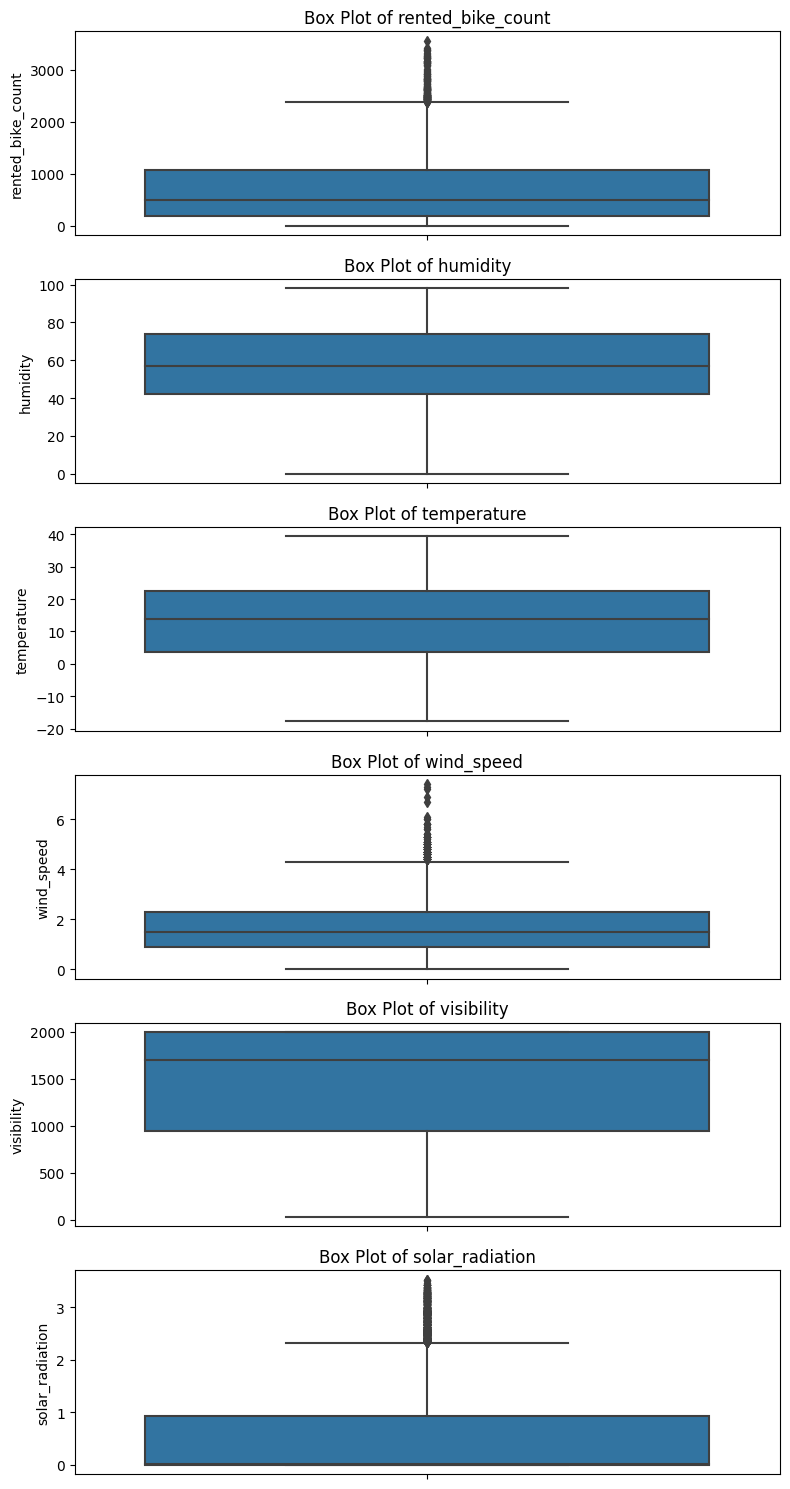

In [ ]:
# Handling Outliers & Outlier treatments

# List of continuous numeric features to check for outliers
numeric_features = ['rented_bike_count', 'humidity', 'temperature', 'wind_speed', 'visibility', 'solar_radiation']

# Set up subplots grid
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(8, 15))

# Create a box plot for each numeric feature
sns.boxplot(data=copy_ds, y=numeric_features[0], ax=axes[0],orient='h')
axes[0].set_ylabel(numeric_features[0])
axes[0].set_xlabel('')
axes[0].set_title(f'Box Plot of {numeric_features[0]}')

sns.boxplot(data=copy_ds, y=numeric_features[1], ax=axes[1],orient='h')
axes[1].set_ylabel(numeric_features[1])
axes[1].set_xlabel('')
axes[1].set_title(f'Box Plot of {numeric_features[1]}')

sns.boxplot(data=copy_ds, y=numeric_features[2], ax=axes[2],orient='h')
axes[2].set_ylabel(numeric_features[2])
axes[2].set_xlabel('')
axes[2].set_title(f'Box Plot of {numeric_features[2]}')

sns.boxplot(data=copy_ds, y=numeric_features[3], ax=axes[3],orient='h')
axes[3].set_ylabel(numeric_features[3])
axes[3].set_xlabel('')
axes[3].set_title(f'Box Plot of {numeric_features[3]}')

sns.boxplot(data=copy_ds, y=numeric_features[4], ax=axes[4],orient='h')
axes[4].set_ylabel(numeric_features[4])
axes[4].set_xlabel('')
axes[4].set_title(f'Box Plot of {numeric_features[4]}')

sns.boxplot(data=copy_ds, y=numeric_features[5], ax=axes[5],orient='h')
axes[5].set_ylabel(numeric_features[5])
axes[5].set_xlabel('')
axes[5].set_title(f'Box Plot of {numeric_features[5]}')

plt.tight_layout()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

As we can check through visualization that our data has potential outliers in numeric features so we can not remove them now first we train a model.

### 3. Textual Data Preprocessing (Not Required In Regression Model)
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

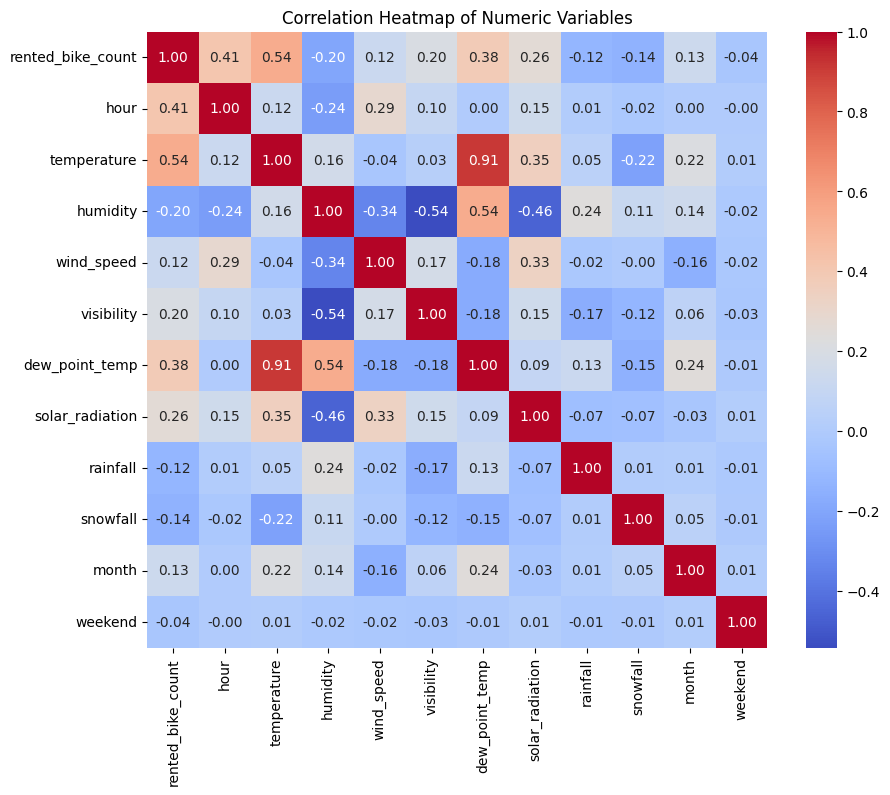

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Correlation Heatmap of Numeric Variables
plt.figure(figsize=(10, 8))
corr_matrix = copy_ds.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# As we saw in correlation heat map dew_point_temp,visibility are both varibles has multicollinearity so we can remove both of them from our dataset.
copy_ds = copy_ds.drop(['dew_point_temp', 'visibility'], axis=1)

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's heatmap to see the relationship of each of the feature with target variable (rental_bike_count) and also check the multicollinearity between two independent variables and observed the following correlations:

##### Which all features you found important and why?

"Temperature", "Humidity", "Wind speed", "Radiation", "Rainfall", "Snowfall", "Holiday", as our final features as they are highly correlated with the target variable (Rented Bike Count) and also have two independent variables ("Dew point temperature", "Visibility") which are highly correlated with another independent variable("Temperature") so we remove these two columns.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# In chart-1 we done transformation of rental_bike_count to right skew to normally distributed

### 6. Categorical Encoding

In [ ]:
# Encode your categorical columns
# encoding
copy_ds['func_day'] = copy_ds['func_day'].map({'Yes':1, 'No':0})
copy_ds['holiday'] = copy_ds['holiday'].map({'Holiday':1, 'No Holiday':0})

In [ ]:
# In our dataset seasons and weekday columns has more then 2 value so here we creat dummies for these columns.
copy_ds_season = pd.get_dummies(copy_ds["seasons"], drop_first = True)
copy_ds_weekday = pd.get_dummies(copy_ds["weekday"], drop_first = True)

# Now we concatenate these two dataframe with our original copy_ds frame.

copy_ds = pd.concat([copy_ds,copy_ds_weekday,copy_ds_season], axis=1)

In [ ]:
# As we created dummies of seasons and weekday columns so now we can remove them from our dataset.
copy_ds.drop(["weekday", "seasons"], axis=1, inplace=True)

In [ ]:
copy_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   solar_radiation    8760 non-null   float64
 6   rainfall           8760 non-null   float64
 7   snowfall           8760 non-null   float64
 8   holiday            8760 non-null   int64  
 9   func_day           8760 non-null   int64  
 10  month              8760 non-null   int64  
 11  weekend            8760 non-null   int64  
 12  Monday             8760 non-null   uint8  
 13  Saturday           8760 non-null   uint8  
 14  Sunday             8760 non-null   uint8  
 15  Thursday           8760 non-null   uint8  
 16  Tuesday            8760 

In [ ]:
copy_ds.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,solar_radiation,rainfall,snowfall,holiday,func_day,...,weekend,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# here we check shape of our data set for next step.
rows, columns = copy_ds.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 8760
Number of columns: 21


#### What all categorical encoding techniques have you used & why did you use those techniques?

1. first we encoding the holiday and function columns because in these columns we only two type of value like in holiday- 'No holiday','Holiday' and in function- 'Yes','No' so we convert them 0 and 1.

2. Next we creat dummies of seasons and weekday columns beacuse in these columns we have more then two value so we creat a dummies of them and then we convert these columns into inttype with help of onehot encoding and then we concatenate these two dummy varible with origininal copy_ds.

3. Next we remove season and weekday columns from our copy_ds dataset.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Splitting the data into features and target variable
X = copy_ds.drop("rented_bike_count", axis=1)  # Features
y = copy_ds["rented_bike_count"]  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()


# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(X)

In [ ]:
# check scaled data
X.head()

,hour,temperature,humidity,wind_speed,solar_radiation,rainfall,snowfall,holiday,func_day,month,weekend,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter
0,0,-5.2,37,2.2,0.0,0.0,0.0,0,1,12,0,0,0,0,0,0,0,0,0,1
1,1,-5.5,38,0.8,0.0,0.0,0.0,0,1,12,0,0,0,0,0,0,0,0,0,1
2,2,-6.0,39,1.0,0.0,0.0,0.0,0,1,12,0,0,0,0,0,0,0,0,0,1
3,3,-6.2,40,0.9,0.0,0.0,0.0,0,1,12,0,0,0,0,0,0,0,0,0,1
4,4,-6.0,36,2.3,0.0,0.0,0.0,0,1,12,0,0,0,0,0,0,0,0,0,1


##### Which method have you used to scale you data and why?

For scaling the data in the Seoul bike rental dataset, I have used the StandardScaler method from the scikit-learn library. StandardScaler scales the features to have zero mean and unit variance. This method is appropriate for our dataset as it ensures that all features are on the same scale, which can improve the performance of machine learning algorithms, particularly those that are sensitive to feature scales.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Splitting the scaled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Checking the shape after spliting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 20), (1752, 20), (7008,), (1752,))

##### What data splitting ratio have you used and why?

For splitting the data into training and testing sets, I have used a ratio of 80:20. This means that 80% of the data will be used for training the machine learning model, and the remaining 20% will be used for testing its performance with random_state=0 so that we do not get different observations in every split.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.  **Evaluation Metric**


- We know that the data we are working with contains outliers, we didnt drop them because if we do so, we may loose out important trends/patterns in the data.

- Decision Trees or any tree based algorithms that we will use here are known to handle outliers. Hence we can use RMSE as the evaluation metric.

- Since RMSE penalizes outliers a lot, this is a good metric to check whether ot not the model has learnt all the trends/patterns in the data.

- In addition to RMSE, we can use R2 score to make the results more explainable to a larger audience.

1.**R-squared (Coefficient of Determination):**

**Indication towards Business:** R-squared measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model. It ranges from 0 to 1, where a higher R-squared indicates that the model explains a larger proportion of the variability in the target variable.


**Business Impact:** A higher R-squared suggests that the model's predictions are closely aligned with the actual data. This indicates that the model is capturing a significant portion of the underlying patterns in the data. In a business context, a high R-squared could lead to more accurate predictions, better decision-making, and potentially improved outcomes.


2.**Root Mean Squared Error (RMSE):**

**Indication towards Business:** RMSE represents the average magnitude of the errors between predicted and actual values. It quantifies the goodness of fit between the model's predictions and the actual data.

**Business Impact:**A lower RMSE indicates that the model's predictions are on average closer to the actual values. In a business context, a lower RMSE implies more accurate predictions, which can lead to better resource allocation, reduced costs, and improved customer satisfaction.






### ML Model - 1 - Linear Regression

In [ ]:
# ML Model - 1 Implementation

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Predict on the train set
y_pred_train = model.predict(X_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model's performance
rmse_test_lr = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test_lr = r2_score(y_test, y_pred_test)

rmse_train_lr = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train_lr = r2_score(y_train, y_pred_train)

print("RMSE on Test Set:", rmse_test_lr)
print("R-squared Score on Test Set:", r2_test_lr)

print("RMSE on Train Set:", rmse_train_lr)
print("R-squared Score on Train Set:", r2_train_lr)


RMSE on Test Set: 438.716505587296
R-squared Score on Test Set: 0.5380441370757874
RMSE on Train Set: 428.46300733830606
R-squared Score on Train Set: 0.5584948225104378


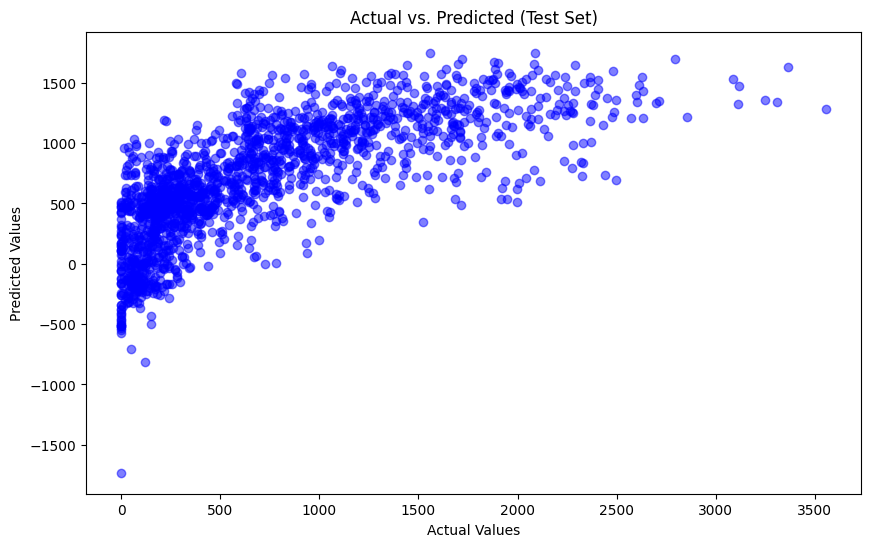

In [ ]:
# Plot Actual vs. Predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set)')
plt.show()

As we can see there is no good result in R2 score and RMSE score so we can go further for hyperparameter tuning in lasso and ridge regression for more better result for our model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Lasso Regression
lasso = Lasso()
lasso_param_grid ={
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 5000]
}

# Fit the Algorithm

lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5)
lasso_grid_search.fit(X_train, y_train)
best_lasso = lasso_grid_search.best_estimator_

# predict on train set and test set

y_pred_lasso_train = best_lasso.predict(X_train)
y_pred_lasso_test = best_lasso.predict(X_test)

# Print best parameter for lasso regression

print(best_lasso)

Lasso(alpha=1, max_iter=100)


In [ ]:
# Calculate metrics for Lasso

# On test set
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

# On train set
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

print("Lasso Regression - Test Set:")
print("RMSE:", rmse_lasso_test)
print("R-squared:", r2_lasso_test)

print("\nLasso Regression - Train Set:")
print("RMSE:", rmse_lasso_train)
print("R-squared:", r2_lasso_train)

Lasso Regression - Test Set:
RMSE: 438.47925788871834
R-squared: 0.5385436319883813

Lasso Regression - Train Set:
RMSE: 428.4922193582267
R-squared: 0.5584346180238069


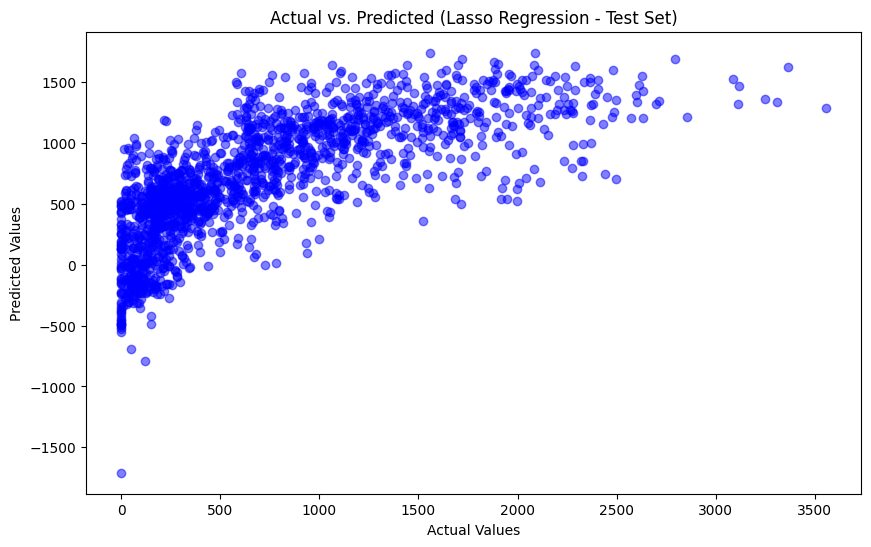

In [ ]:
# Plot Actual vs. Predicted for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso_test, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Lasso Regression - Test Set)')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for hyperparameter tuning in lasso regression for gatting batter model to predict our dependent variable rental_bike_count.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here. There is no good imporvement in r2 score so we can go for ridge regression.

In [ ]:

# Ridge Regression
ridge = Ridge()
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000, 5000]
}

# Fit the Algorithm

ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5)
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_

# predict on train set and test set

y_pred_ridge_train = best_ridge.predict(X_train)
y_pred_ridge_test = best_ridge.predict(X_test)

# Print best parameter for ridge regression

print(best_ridge)

Ridge(alpha=10, max_iter=100)


In [ ]:
# Calculate metrics for Ridge

# On test set

rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

# On train set

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

print("\nRidge Regression - Test Set:")
print("RMSE:", rmse_ridge_test)
print("R-squared:", r2_ridge_test)

print("\nRidge Regression - Train Set:")
print("RMSE:", rmse_ridge_train)
print("R-squared:", r2_ridge_train)


Ridge Regression - Test Set:
RMSE: 438.43088748671863
R-squared: 0.5386454365708078

Ridge Regression - Train Set:
RMSE: 428.440828044753
R-squared: 0.5585405301646418


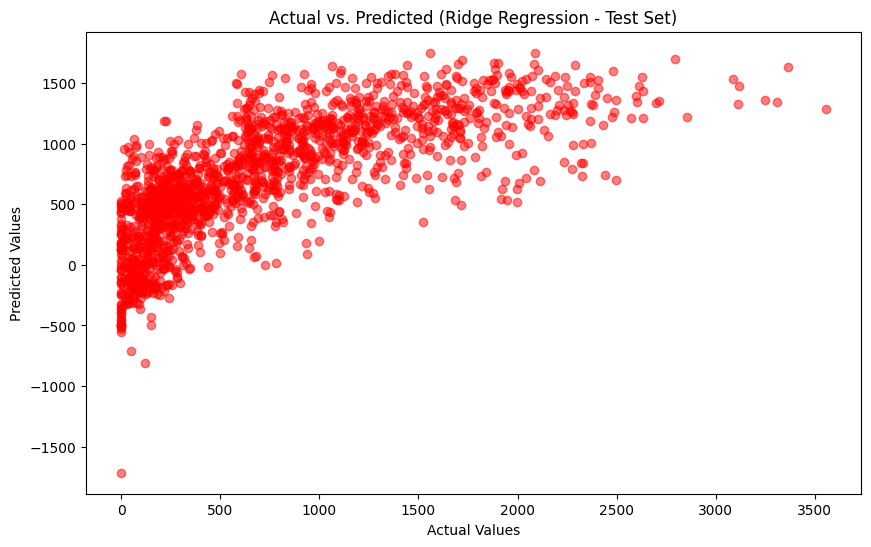

In [ ]:
# Plot Actual vs. Predicted for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge_test, color='red', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Ridge Regression - Test Set)')
plt.show()

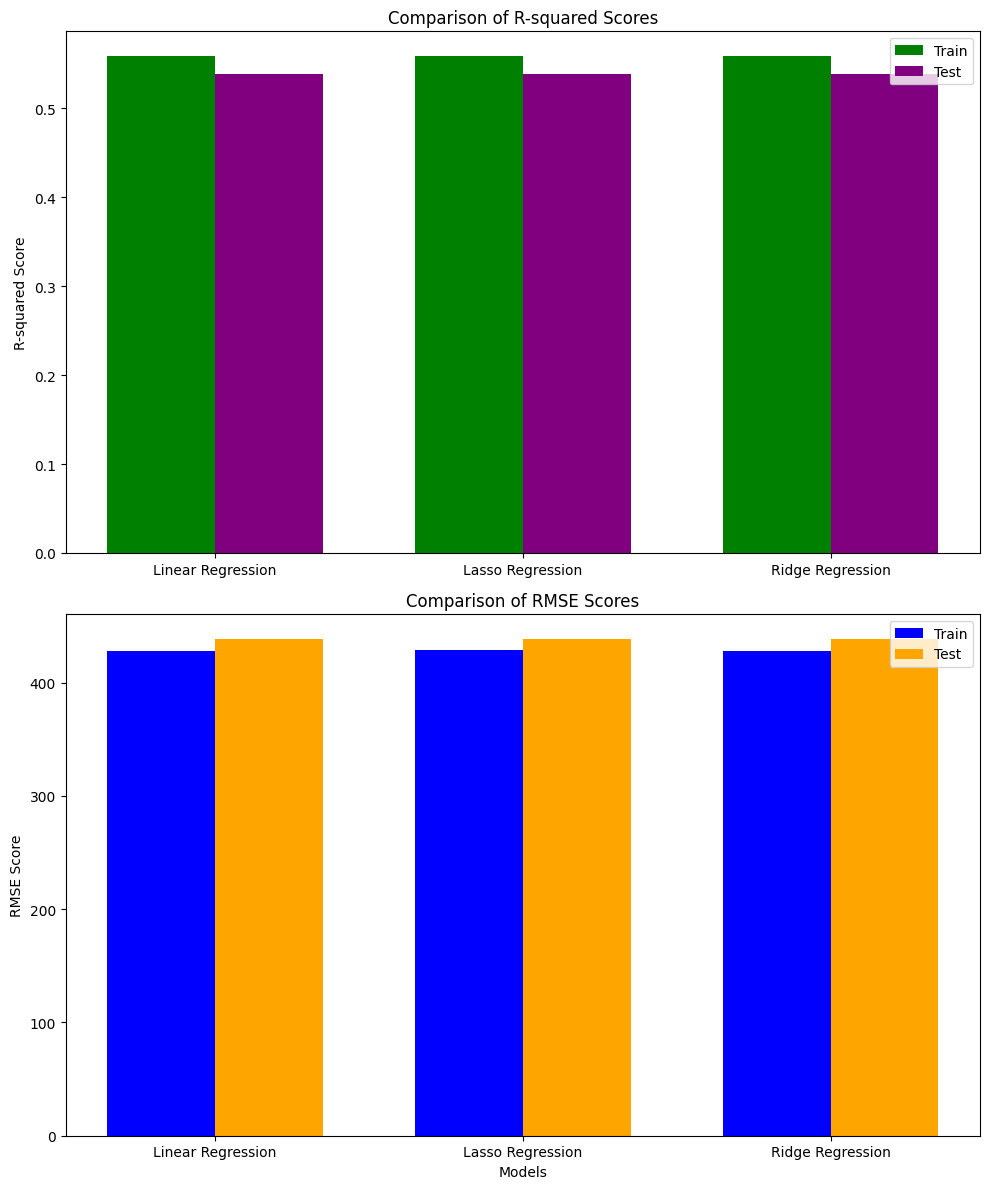

In [ ]:
# Visualizing evaluation Metric Score chart for linear lasso and ridge regression

# R-squared scores
r2_scores_train = [r2_train_lr, r2_lasso_train, r2_ridge_train]
r2_scores_test = [r2_test_lr, r2_lasso_test, r2_ridge_test]

# RMSE scores
rmse_scores_train = [rmse_train_lr, rmse_lasso_train, rmse_ridge_train]
rmse_scores_test = [rmse_test_lr, rmse_lasso_test, rmse_ridge_test]

# Labels for the models
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']

# Bar width
bar_width = 0.35

# Create subplots for R-squared and RMSE scores
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Bar plot for R-squared scores
ax1.bar(np.arange(len(models)), r2_scores_train, bar_width, label='Train', color='green')
ax1.bar(np.arange(len(models)) + bar_width, r2_scores_test, bar_width, label='Test', color='purple')
ax1.set_ylabel('R-squared Score')
ax1.set_title('Comparison of R-squared Scores')
ax1.set_xticks(np.arange(len(models)) + bar_width/2)
ax1.set_xticklabels(models)
ax1.legend()

# Bar plot for RMSE scores
ax2.bar(np.arange(len(models)), rmse_scores_train, bar_width, label='Train', color='blue')
ax2.bar(np.arange(len(models)) + bar_width, rmse_scores_test, bar_width, label='Test', color='orange')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE Score')
ax2.set_title('Comparison of RMSE Scores')
ax2.set_xticks(np.arange(len(models)) + bar_width/2)
ax2.set_xticklabels(models)
ax2.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for hyperparameter tuning in lasso regression for getting batter model to predict our dependent variable rental_bike_count.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here. In Visualizing evaluation Metric Score chart we can saw that r2 and rmse score of linear, lasso and ridge regression where is no more improvement in our model so we can go for another models like decision tree, random forest etc. for better model for our case.

### ML Model - 2 - Decision Tree

In [ ]:
# ML Model - 2: Decision Tree Implementation

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)

# Fit the Algorithm on Training Data as a model
model.fit(X_train, y_train)


# Predicting on the test set as a y_pred_test
y_pred_test = model.predict(X_test)


# Predicting on the train set as a y_pred_train
y_pred_train = model.predict(X_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model on test set rmse score and r2 score
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)
print("RMSE on Test Set:", rmse_test)
print("R-squared Score on Test Set:", r2_test)




RMSE on Test Set: 238.42108101454895
R-squared Score on Test Set: 0.8635662422279569


In [ ]:
# Evaluate the model on test set rmse and r2 score
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)
print("RMSE on Train Set:", rmse_train)
print("R-squared Score on Train Set:", r2_train)

RMSE on Train Set: 0.0
R-squared Score on Train Set: 1.0


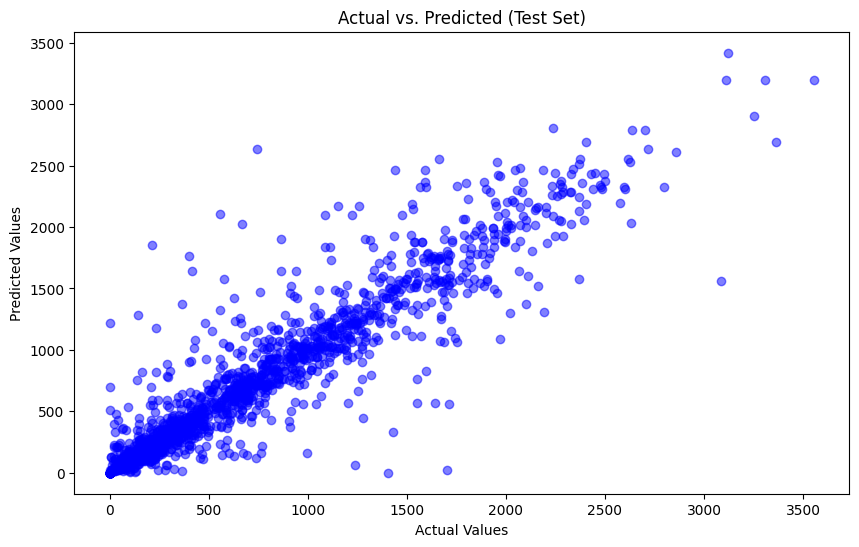

In [ ]:
# Plot Actual vs. Predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set)')
plt.show()








<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

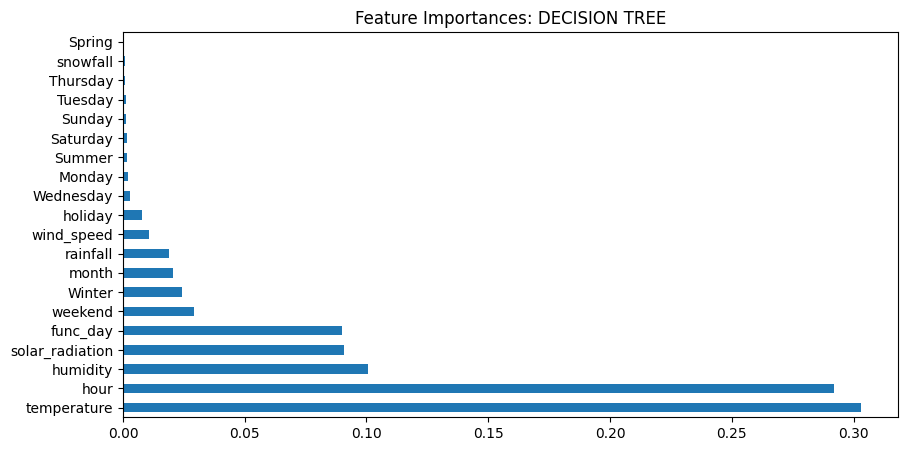

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')



In [ ]:
# Visualizing evaluation Metric Score chart

# I will plot chart for metric score after Cross- Validation & Hyperparameter Tuning

Decision tree is low bias, high variance model. So we fit a decision tree model on a dataset without tuning the hyperparameters, we get zero RMSE for training data and high RMSE for test data. Also the R2 score is 1 for train data, and is significantly low when that model is fit on test data. Our aim is to build a generalized model, that is able to predict the dependent variable for unseen data with less error. To achieve this, we can tune the decision tree hyperparameters, thereby reducing the model complexity, which in turn improve predictions for the test data

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }
grid_search = GridSearchCV(model, param_grid, cv=5)
# Fit the Algorithm
grid_search.fit(X_train, y_train)

print("Best Model Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Model Parameters: {'max_depth': 20, 'min_samples_leaf': 30}
Best Score: 0.8288770766256295


In [ ]:
# Fit the best model on the training data as a best_model _o
best_model_o = grid_search.best_estimator_
best_model_o.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=20, min_samples_leaf=30, random_state=0)

In [ ]:
# Predict on the train set using the best model
y_pred_train_best = best_model_o.predict(X_train)
rmse_train_best = mean_squared_error(y_train, y_pred_train_best, squared=False)
r2_train_best = r2_score(y_train, y_pred_train_best)
print("RMSE on Train Set (Best Model):", rmse_train_best)
print("R-squared Score on Train Set (Best Model):", r2_train_best)

# Predict on the test set using the best model
y_pred_test_best = best_model_o.predict(X_test)
rmse_test_best = mean_squared_error(y_test, y_pred_test_best, squared=False)
r2_test_best = r2_score(y_test, y_pred_test_best)
print("RMSE on Test Set (Best Model):", rmse_test_best)
print("R-squared Score on Test Set (Best Model):", r2_test_best)


RMSE on Train Set (Best Model): 245.96035871695156
R-squared Score on Train Set (Best Model): 0.8545079132354011
RMSE on Test Set (Best Model): 279.81765011826013
R-squared Score on Test Set (Best Model): 0.8120757846072364


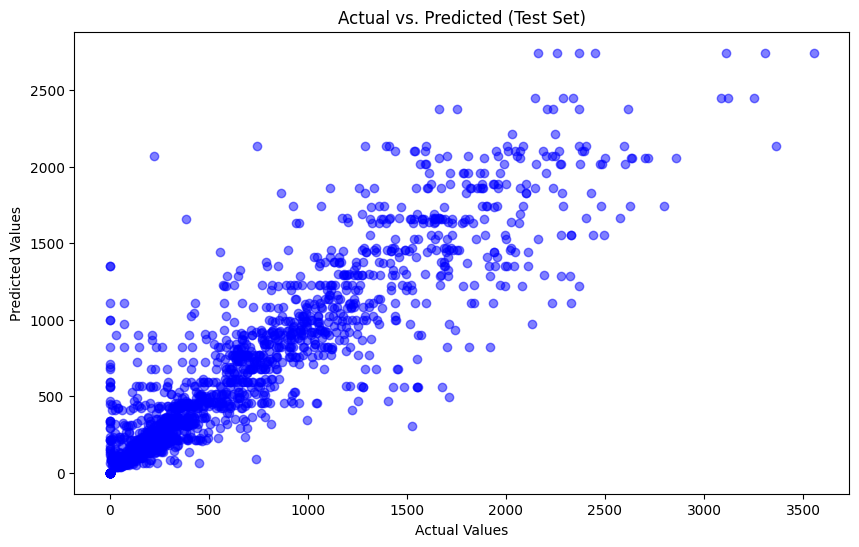

In [ ]:
# Plot Actual vs. Predicted for test set after hyperparameter tuning
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_best, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set)')
plt.show()

<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

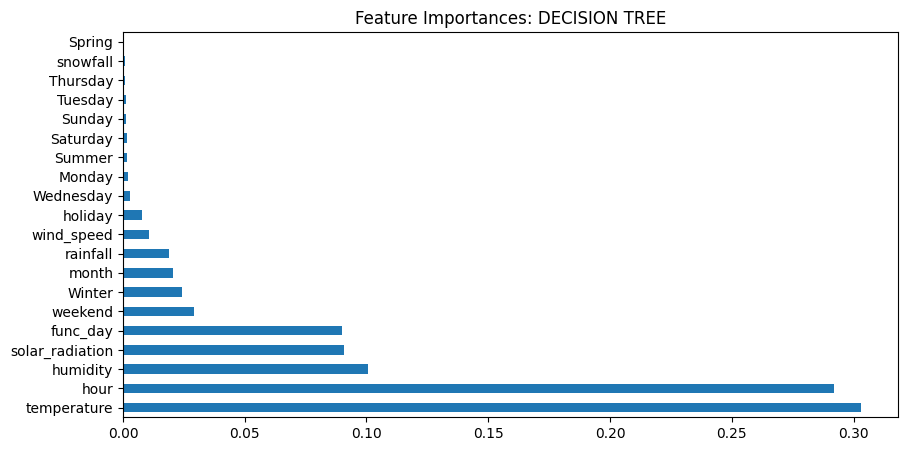

In [ ]:
# Feature importances after hyperparameter tuning

dt_feat_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

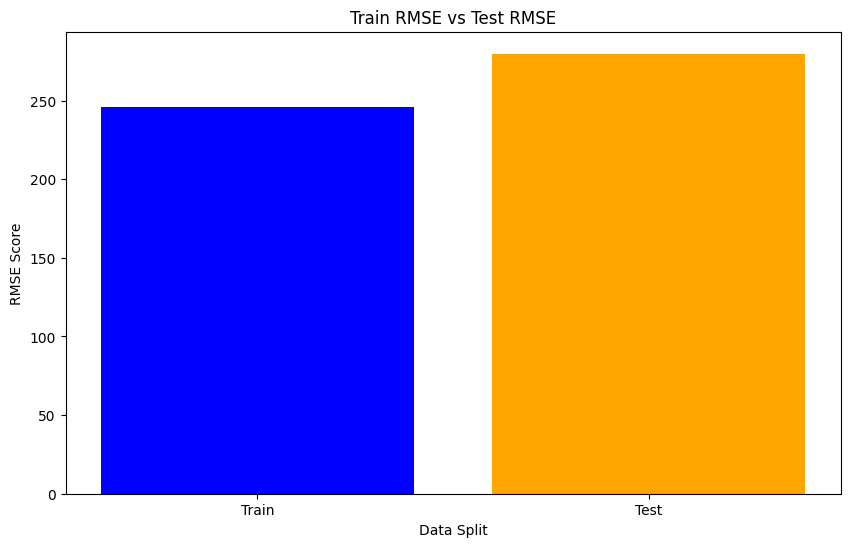

In [ ]:
# Visualizing evaluation Metric Score chart

# Lists to store RMSE and R-squared scores
rmse_scores_train = [rmse_train_best]
rmse_scores_test = [rmse_test_best]
r2_scores_train = [r2_train_best]
r2_scores_test = [r2_test_best]

# Create a bar plot for RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [rmse_train_best,rmse_test_best], color=['blue', 'orange'])
plt.xlabel('Data Split')
plt.ylabel('RMSE Score')
plt.title('Train RMSE vs Test RMSE')
plt.show()




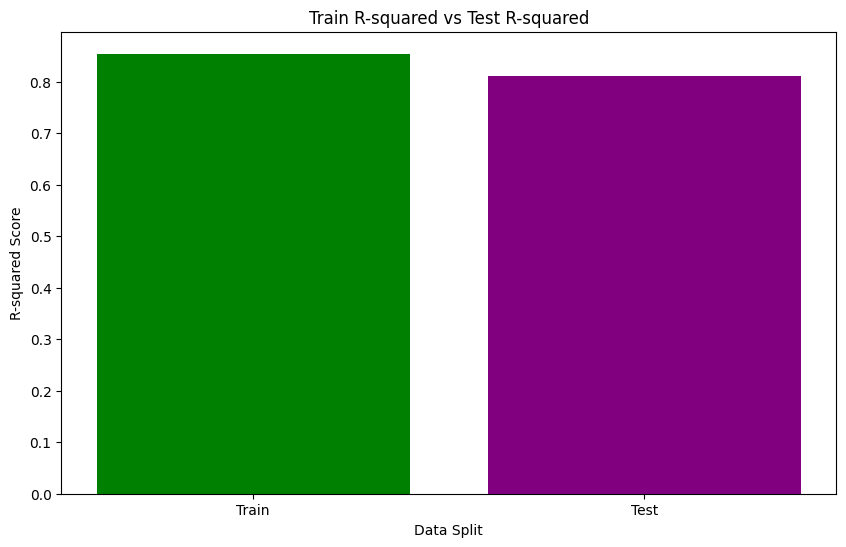

In [ ]:

# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [r2_train_best, r2_test_best], color=['green', 'purple'])
plt.xlabel('Data Split')
plt.ylabel('R-squared Score')
plt.title('Train R-squared vs Test R-squared')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It can calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can saw that before hyperparameter tuning we got R2 score for train set 1 and RMSE zero for train set so due to this we can not predict acurattly dependent variable on unseen data and after hyperparameter tuning we got best parameter - Best Model Parameters: {'max_depth': 20, 'min_samples_leaf': 30} and after tuning we got R2 score for train set is 0.8545079132354011 and RMSE score is 245.96035871695156 which is good for our unseen data.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)

# Fit the Algorithm on Training Data as a rf_model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_test_rf = rf_model.predict(X_test)

# Predicting on the train set
y_pred_train_rf = rf_model.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model on test set
rmse_test_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
print("RMSE on Test Set (Random Forest):", rmse_test_rf)
print("R-squared Score on Test Set (Random Forest):", r2_test_rf)

# Evaluate the model on train set
rmse_train_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
print("RMSE on Train Set (Random Forest):", rmse_train_rf)
print("R-squared Score on Train Set (Random Forest):", r2_train_rf)

RMSE on Test Set (Random Forest): 169.32106160814604
R-squared Score on Test Set (Random Forest): 0.9311895336873961
RMSE on Train Set (Random Forest): 61.584537713637154
R-squared Score on Train Set (Random Forest): 0.9908787888630654


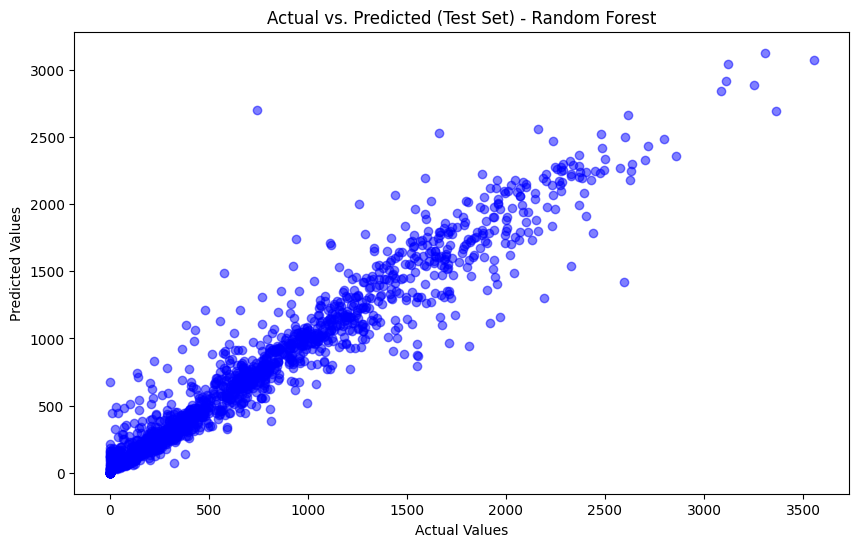

In [ ]:
# Plot Actual vs. Predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set) - Random Forest')
plt.show()

<Axes: title={'center': 'Feature Importances: RANDOM FOREST'}>

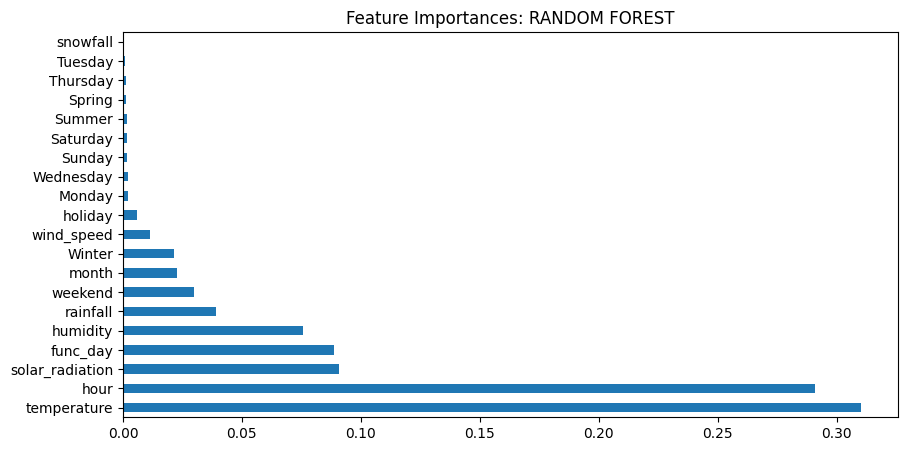

In [ ]:
# Feature importances
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FOREST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [ ]:
# Visualizing evaluation Metric Score chart

# I will plot chart for metric score after Cross- Validation & Hyperparameter Tuning

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [500],                 # limited due to computational power availability
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [20, 25, 30]
}

# Fit the Algorithm
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)

# Fit the GridSearchCV on Training Data
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
# Predicting on the test set using the best model
y_pred_test_rf_best = best_rf_model.predict(X_test)
rmse_test_rf_best = mean_squared_error(y_test, y_pred_test_rf_best, squared=False)
r2_test_rf_best = r2_score(y_test, y_pred_test_rf_best)

# Predicting on the train set using the best model
y_pred_train_rf_best = best_rf_model.predict(X_train)
rmse_train_rf_best = mean_squared_error(y_train, y_pred_train_rf_best, squared=False)
r2_train_rf_best = r2_score(y_train, y_pred_train_rf_best)

# Print evaluation metrics
print("Random Forest - Best Model - RMSE on Test Set:", rmse_test_rf_best)
print("Random Forest - Best Model - R-squared Score on Test Set:", r2_test_rf_best)
print("Random Forest - Best Model - RMSE on Train Set:", rmse_train_rf_best)
print("Random Forest - Best Model - R-squared Score on Train Set:", r2_train_rf_best)

Random Forest - Best Model - RMSE on Test Set: 235.05729955550743
Random Forest - Best Model - R-squared Score on Test Set: 0.8673888563635802
Random Forest - Best Model - RMSE on Train Set: 200.02497856957376
Random Forest - Best Model - R-squared Score on Train Set: 0.9037772859305759


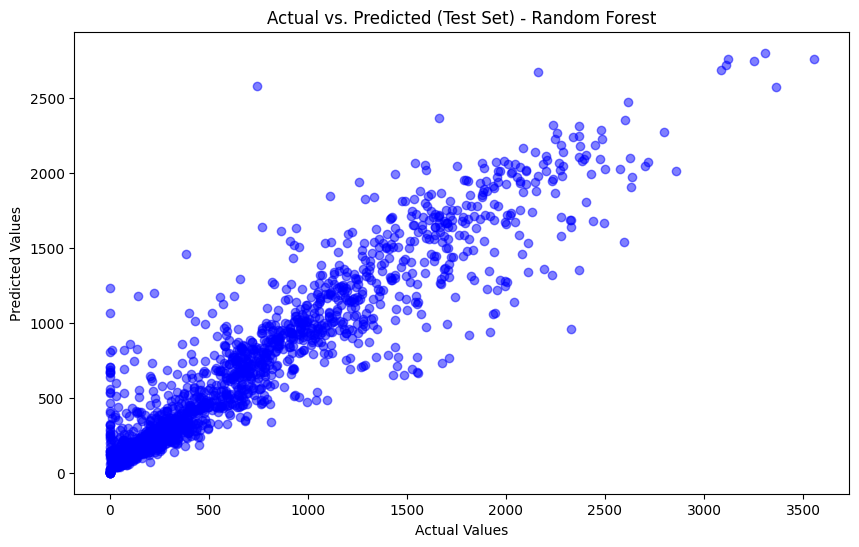

In [ ]:
# Plot Actual vs. Predicted for test set after hyperparameter tuning.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf_best, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set) - Random Forest')
plt.show()

<Axes: title={'center': 'Feature Importances: RANDOM FOREST'}>

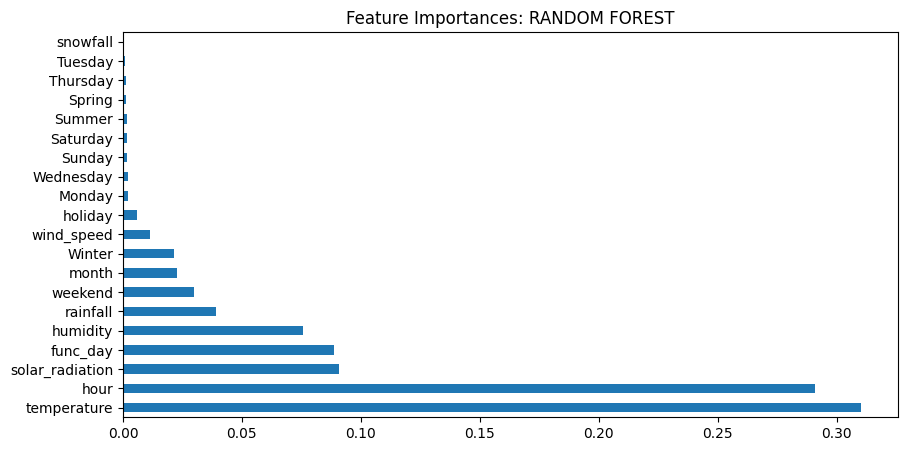

In [ ]:
# Feature importances after hyperparameter tuning.
rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FOREST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

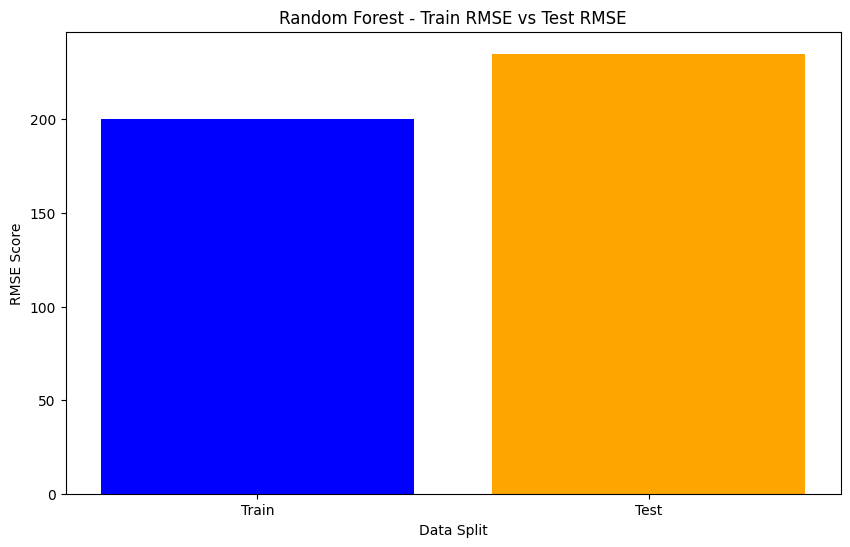

In [ ]:
# Visualizing evaluation Metric Score chart for RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [rmse_train_rf_best, rmse_test_rf_best], color=['blue', 'orange'])
plt.xlabel('Data Split')
plt.ylabel('RMSE Score')
plt.title('Random Forest - Train RMSE vs Test RMSE')
plt.show()



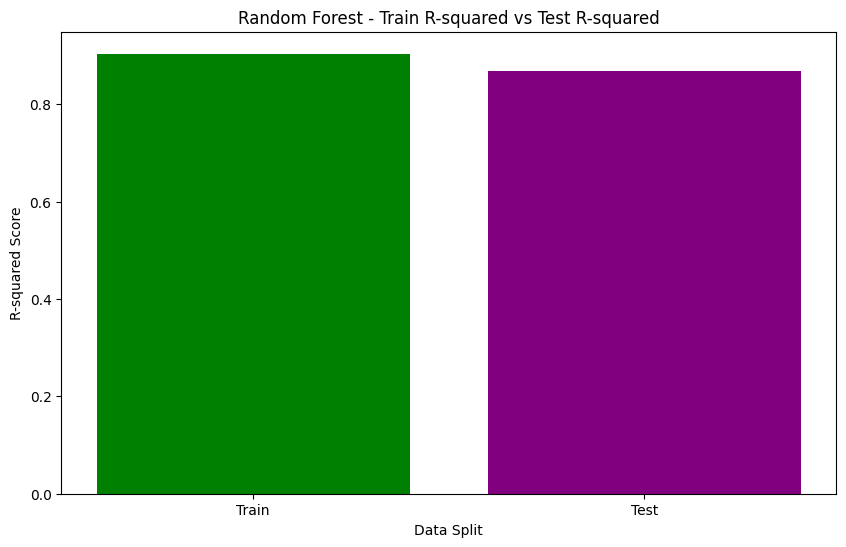

In [ ]:
# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [r2_train_rf_best, r2_test_rf_best], color=['green', 'purple'])
plt.xlabel('Data Split')
plt.ylabel('R-squared Score')
plt.title('Random Forest - Train R-squared vs Test R-squared')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have utilized the hyperparameter optimization technique called GridSearchCV in combination with the Random Forest algorithm. GridSearchCV is a systematic approach that helps find the best combination of hyperparameters for a machine learning model, and in this case, I applied it specifically to the Random Forest model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After use GridSearchCV we got Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 500} and after that we can see imporvment in our model before tuning we got R2 score- 0.9908787888630654 and RMSE score- 61.584537713637154 for train set and after tuning we got R2 score- 0.9037772859305759 and RMSE score- 200.02497856957376 for train set. As we can saw before tuning we got R2 score is approx. 1 for train set  that indicate that our model is overfitted and after hyperparameter tuning we got best parameter with the help of these parameter we got R2 score 0.903777 so that is good for our test set and we can predict good value between actual and predication.

### ML Model - 4

In [ ]:
# ML Model - 4 Implementation

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=0)

# Fit the Algorithm on Training Data
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# Predicting on the train set
y_pred_train_xgb = xgb_model.predict(X_train)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model on test set
rmse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb, squared=False)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
print("RMSE on Test Set (XGBoost):", rmse_test_xgb)
print("R-squared Score on Test Set (XGBoost):", r2_test_xgb)

# Evaluate the model on train set
rmse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb, squared=False)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
print("RMSE on Train Set (XGBoost):", rmse_train_xgb)
print("R-squared Score on Train Set (XGBoost):", r2_train_xgb)

RMSE on Test Set (XGBoost): 170.3070126176528
R-squared Score on Test Set (XGBoost): 0.9303858383402799
RMSE on Train Set (XGBoost): 80.71719893419758
R-squared Score on Train Set (XGBoost): 0.9843309992113527


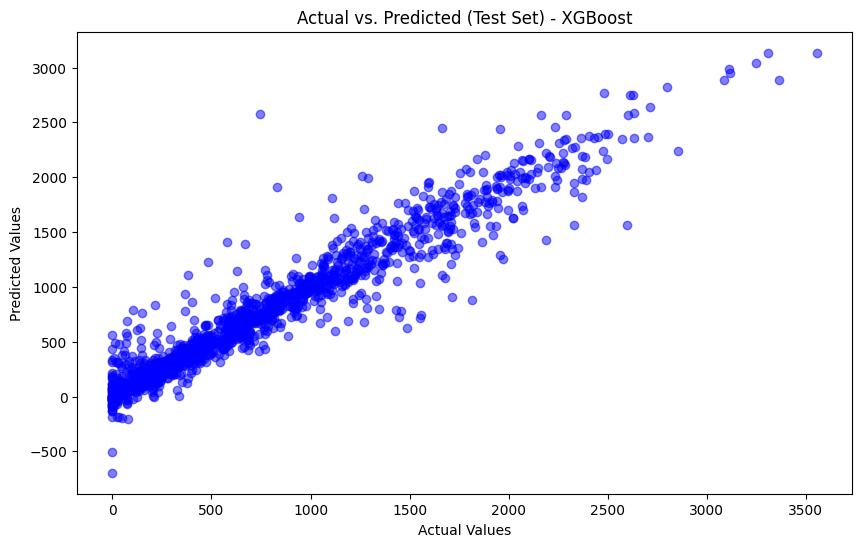

In [ ]:
# Plot Actual vs. Predicted for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_xgb, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set) - XGBoost')
plt.show()

<Axes: title={'center': 'Feature Importances: XGBOOST'}>

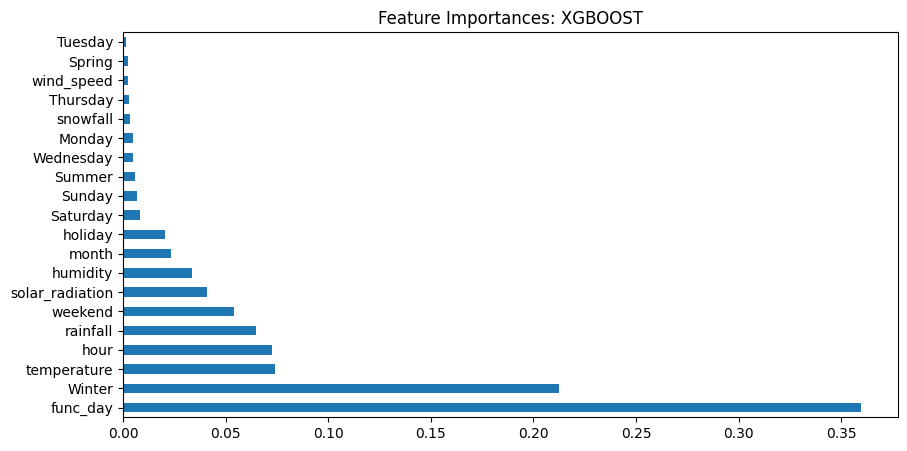

In [ ]:
# Feature importances
xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XGBOOST')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

In [ ]:
# Visualizing evaluation Metric Score chart

# I will plot chart for metric score after Cross- Validation & Hyperparameter Tuning

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=0)

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [500],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]

}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)

# Fit the GridSearchCV on Training Data
grid_search_xgb.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters for xgboost:", best_params_xgb)


Best Parameters for xgboost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [ ]:
# Predicting on the test set using the best model
y_pred_test_xgb_best = best_xgb_model.predict(X_test)
rmse_test_xgb_best = mean_squared_error(y_test, y_pred_test_xgb_best, squared=False)
r2_test_xgb_best = r2_score(y_test, y_pred_test_xgb_best)

# Predicting on the train set using the best model
y_pred_train_xgb_best = best_xgb_model.predict(X_train)
rmse_train_xgb_best = mean_squared_error(y_train, y_pred_train_xgb_best, squared=False)
r2_train_xgb_best = r2_score(y_train, y_pred_train_xgb_best)

# Print evaluation metrics
print("XGBoost - Best Model - RMSE on Test Set:", rmse_test_xgb_best)
print("XGBoost - Best Model - R-squared Score on Test Set:", r2_test_xgb_best)
print("XGBoost - Best Model - RMSE on Train Set:", rmse_train_xgb_best)
print("XGBoost - Best Model - R-squared Score on Train Set:", r2_train_xgb_best)

XGBoost - Best Model - RMSE on Test Set: 157.27444135738625
XGBoost - Best Model - R-squared Score on Test Set: 0.9406324894703904
XGBoost - Best Model - RMSE on Train Set: 3.0754162048065967
XGBoost - Best Model - R-squared Score on Train Set: 0.9999772533767664


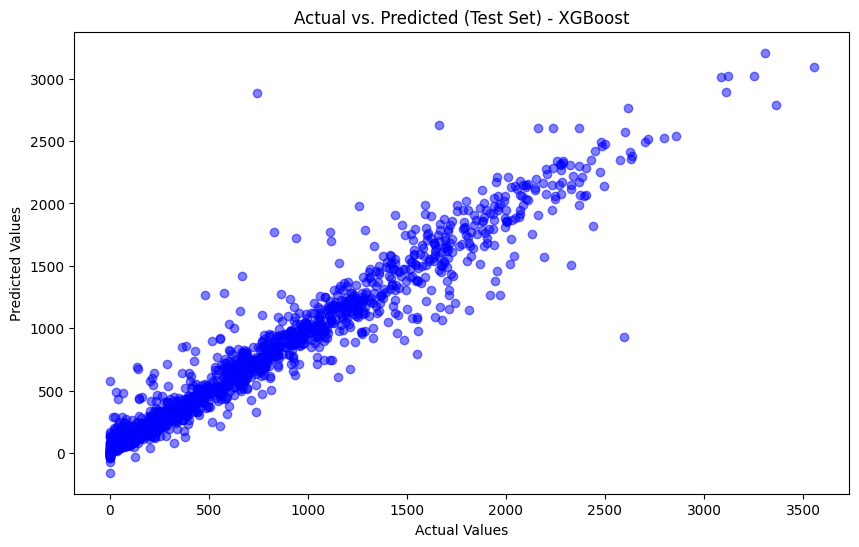

In [ ]:
# Plot Actual vs. Predicted for test set after hyperparameter tuning.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_xgb_best, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set) - XGBoost')
plt.show()

<Axes: title={'center': 'Feature Importances: XGBOOST'}>

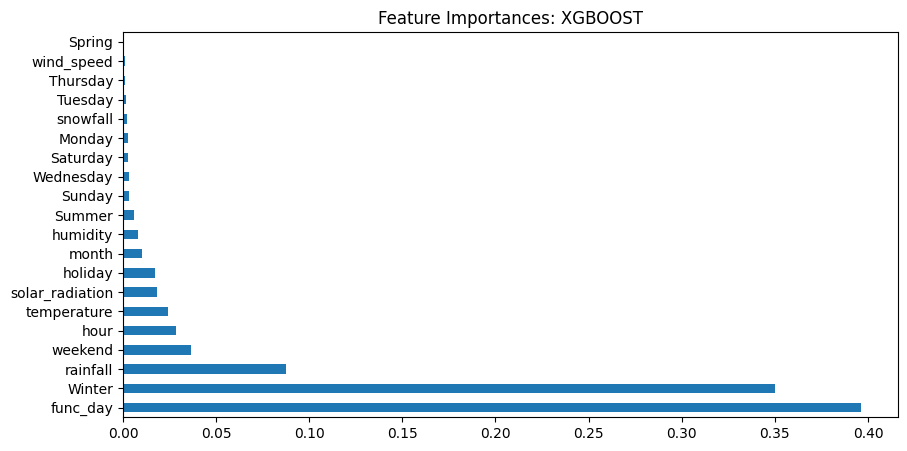

In [ ]:
# Feature importances after hyperparameter tuning.
xgb_feat_imp = pd.Series(best_xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XGBOOST')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

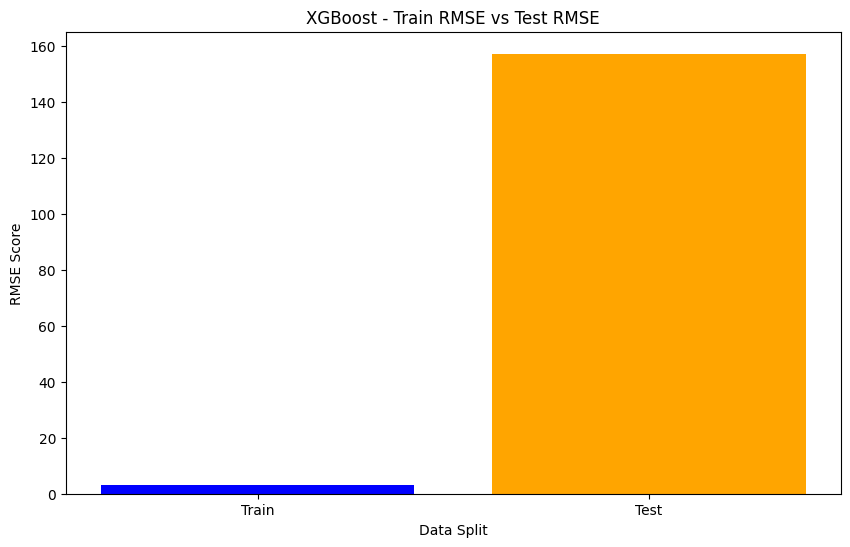

In [ ]:
# Visualizing evaluation Metric Score chart for RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [rmse_train_xgb_best, rmse_test_xgb_best], color=['blue', 'orange'])
plt.xlabel('Data Split')
plt.ylabel('RMSE Score')
plt.title('XGBoost - Train RMSE vs Test RMSE')
plt.show()

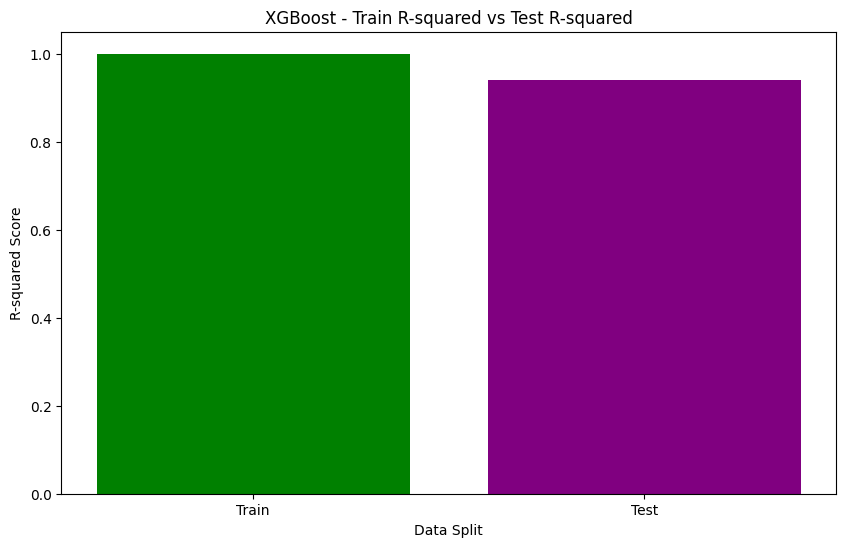

In [ ]:
# Create a bar plot for R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [r2_train_xgb_best, r2_test_xgb_best], color=['green', 'purple'])
plt.xlabel('Data Split')
plt.ylabel('R-squared Score')
plt.title('XGBoost - Train R-squared vs Test R-squared')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used the GridSearchCV hyperparameter optimization technique in combination with the XGBoost algorithm. GridSearchCV is a powerful method for systematically searching through a predefined hyperparameter grid to find the best combination of hyperparameters that optimize the performance of a machine learning model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After use GridSearchCV we got Best Parameters for xgboost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500} and after that we can see improvement in our model before tuning we got R2 score-0.9303858383402799 and RMSE score-170.3070126176528 for test set and after tuning we got R2 score-0.9406324894703904 and RMSE score-157.27444135738625 for test set.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 I considered the following evaluation metrics: R-squared (R2) score and Root Mean Squared Error (RMSE). These metrics were chosen because they provide valuable insights into the model's predictive performance and its impact on the business and the R-squared (R2) score and Root Mean Squared Error (RMSE) are both vital evaluation metrics for assessing the predictive performance of the model in the context of Seoul bike rental count prediction. These metrics help businesses make informed decisions, optimize resource allocation, and improve overall operational efficiency.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Create a dictionary to store model names and their evaluation metrics
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
r2_scores_train = [r2_train_lr, r2_lasso_train, r2_ridge_train, r2_train_best, r2_train_rf_best, r2_train_xgb_best]
r2_scores_test = [r2_test_lr, r2_lasso_test, r2_ridge_test, r2_test_best, r2_test_rf_best, r2_test_xgb_best]
rmse_scores_train = [rmse_train_lr, rmse_lasso_train, rmse_ridge_train, rmse_train_best, rmse_train_rf_best, rmse_train_xgb_best]
rmse_scores_test = [rmse_test_lr, rmse_lasso_test, rmse_ridge_test, rmse_test_best, rmse_test_rf_best, rmse_test_xgb_best]

evaluation_matrix = {
    'Model': models,
    'R-squared (Train)': r2_scores_train,
    'R-squared (Test)': r2_scores_test,
    'RMSE (Train)': rmse_scores_train,
    'RMSE (Test)': rmse_scores_test
}

# Create a DataFrame from the evaluation matrix
evaluation_df = pd.DataFrame(evaluation_matrix)

# Display the combined evaluation matrix
print(evaluation_df)

               Model  R-squared (Train)  R-squared (Test)  RMSE (Train)  \
0  Linear Regression           0.558495          0.538044    428.463007   
1   Lasso Regression           0.558435          0.538544    428.492219   
2   Ridge Regression           0.558541          0.538645    428.440828   
3      Decision Tree           0.854508          0.812076    245.960359   
4      Random Forest           0.903777          0.867389    200.024979   
5            XGBoost           0.999977          0.940632      3.075416   

   RMSE (Test)  
0   438.716506  
1   438.479258  
2   438.430887  
3   279.817650  
4   235.057300  
5   157.274441  


As we saw in above Combined Evaluation Matrix of All the models dataframe so according to that I chose XGBoost as the final prediction model because:

**High R-squared (Test) Score:** The XGBoost model has the highest R-squared score on the test set among all the models, indicating that it explains a significant portion of the variance in the target variable. A high R-squared score suggests that the model's predictions closely match the actual data.

**Low RMSE (Test) Score:** The XGBoost model also has the lowest RMSE (Root Mean Squared Error) on the test set. A lower RMSE indicates that the model's predictions are, on average, closer to the actual data points, which is a desirable property.

**Consistency Across Metrics:** The XGBoost model performs consistently well across both R-squared and RMSE metrics on the test set. This indicates that the model is able to capture the underlying patterns in the data effectively and make accurate predictions.

**Avoiding Overfitting:** The XGBoost model achieves a very high R-squared score on the training set (close to 1), but it still maintains a high R-squared score on the test set. This suggests that the model is able to generalize well to unseen data and is not overfitting the training data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I have used the XGBoost model, which aims to predict bike rental counts accurately by utilizing well-tuned features. This model is capable of working well with large datasets and can use a model explainability tool to analyze feature importance.

To analyze feature importance, I have applied the feature_importances_ attribute of the XGBoost model to explain the significance of features and their contributions. I have presented the importance of certain features in a chart, highlighting the valuable contributions of those features to predicting bike rentals.

As we can saw in XGBoost model Func_day is the most important feature in predicting the value of the dependent variable follwed by winter and rainfall. Many features have a significant importance for XG boost model, rather than the top few features for other models.

# **Conclusion**

Throughout the course of the Seoul Bike Rental project, a comprehensive exploration and analysis of the dataset was carried out to develop predictive models for bike rental counts. The project involved various steps, including data preprocessing, exploratory data analysis, feature engineering, model selection, hyperparameter tuning, and evaluation.

Multiple machine learning models were implemented, including Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, Random Forest, and XGBoost. Each model's performance was assessed using evaluation metrics such as R-squared and RMSE scores. Hyperparameter tuning was employed to optimize model performance, with techniques like GridSearchCV being used to fine-tune model parameters.

The key takeaways from the project are as follows:

**Model Performance:** The XGBoost model demonstrated the best performance among all the models, achieving an exceptional R-squared score close to 1 and a low RMSE score. This suggests that the XGBoost model provides an accurate prediction of bike rental counts.

**Feature Importance:** Through the use of model explainability tools, such as feature_importances_ in XGBoost, important features were identified. These features significantly contribute to the prediction of bike rental counts, enabling a deeper understanding of the factors that influence bike rentals.

**Hyperparameter Tuning:** The application of hyperparameter tuning techniques like GridSearchCV helped in finding the optimal parameters for each model, leading to improved model performance. The optimal parameters varied for different models.

**Business Impact:** The predictive models developed in this project can have a positive impact on bike rental businesses and urban planning. Accurate predictions of bike rental counts can assist in resource allocation, route planning, and demand forecasting.

**Model Evaluation:** The evaluation metrics, R-squared and RMSE scores, were used to assess model performance. R-squared indicates the proportion of variance explained by the model, while RMSE measures the difference between predicted and actual values. These metrics provide insights into how well the models fit the data and make predictions.

In conclusion, the Seoul Bike Rental project successfully built predictive models using various machine learning techniques. The XGBoost model emerged as the most accurate predictor, and its feature importance analysis highlighted the key factors influencing bike rental counts. The project showcased the importance of thorough data preprocessing, model selection, and parameter optimization to achieve accurate predictions for practical applications.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***